<a href="https://colab.research.google.com/github/GOWTHAMVANTAKULA/INTELLIGENT-DOCUMENT-ASSISTANT/blob/main/ML_PRACTICE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual ---  **VANTAKULA GOWTHAM NAIDU**


# **Project Summary -**

In the highly competitive e-commerce industry, delivering excellent customer service is essential for retaining customers and sustaining growth. This project leverages a Flipkart customer service dataset that includes customer interactions, issue categories, resolution times, agent details, and customer satisfaction scores (CSAT).

The main objective of this project is to **predict customer satisfaction (CSAT)** by combining structured features (such as issue type, response time, channel, and agent shift) with unstructured text data (customer remarks). By framing CSAT prediction as a **classification problem (High vs Low satisfaction)**, the project aims to uncover the key factors influencing customer happiness and dissatisfaction.

Additionally, the project explores **regression modeling** to estimate issue resolution times and applies **NLP-based sentiment analysis** to customer remarks to extract deeper insights into customer experiences. This dual approach integrates operational metrics with customer sentiment, offering a holistic perspective on service performance.

The outcomes of this project can help e-commerce platforms in:

* Enhancing agent training and performance management.

* Automating ticket routing and prioritization.

* Reducing resolution delays for issues associated with low satisfaction.

* Improving overall customer experience through data-driven strategies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the e-commerce domain, understanding and predicting customer satisfaction (CSAT) is critical for improving service quality and customer retention. This project aims to develop a classification model to predict customer satisfaction (High vs. Low) using a Flipkart customer service dataset. The challenge lies in integrating structured operational data (issue type, resolution time, agent details, etc.) with unstructured text data (customer remarks) to identify key drivers of satisfaction and dissatisfaction. Additionally, the project seeks to explore factors influencing issue resolution times and leverage sentiment analysis on customer remarks to gain deeper insights, ultimately providing actionable recommendations for enhancing customer service performance and business growth

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#WARNINGS
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Data_Files/FLIPKART_DATA_MODULE_6_DATASET.csv')

pd.set_option('display.max_columns',None) # display all columns
pd.set_option('display.max_rows',100)


### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
data_2 = data

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('ROWS = ',data.shape[0],'\nCOLUMNS = ', data.shape[1])

ROWS =  85907 
COLUMNS =  20


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
# percentage of missing values
missing_percent = data.isnull().mean() * 100
missing_percent

,0
Unique id,0.000000
channel_name,0.000000
category,0.000000
Sub-category,0.000000
Customer Remarks,66.542889
Order_id,21.222950
order_date_time,79.962052
Issue_reported at,0.000000
issue_responded,0.000000
Survey_response_Date,0.000000


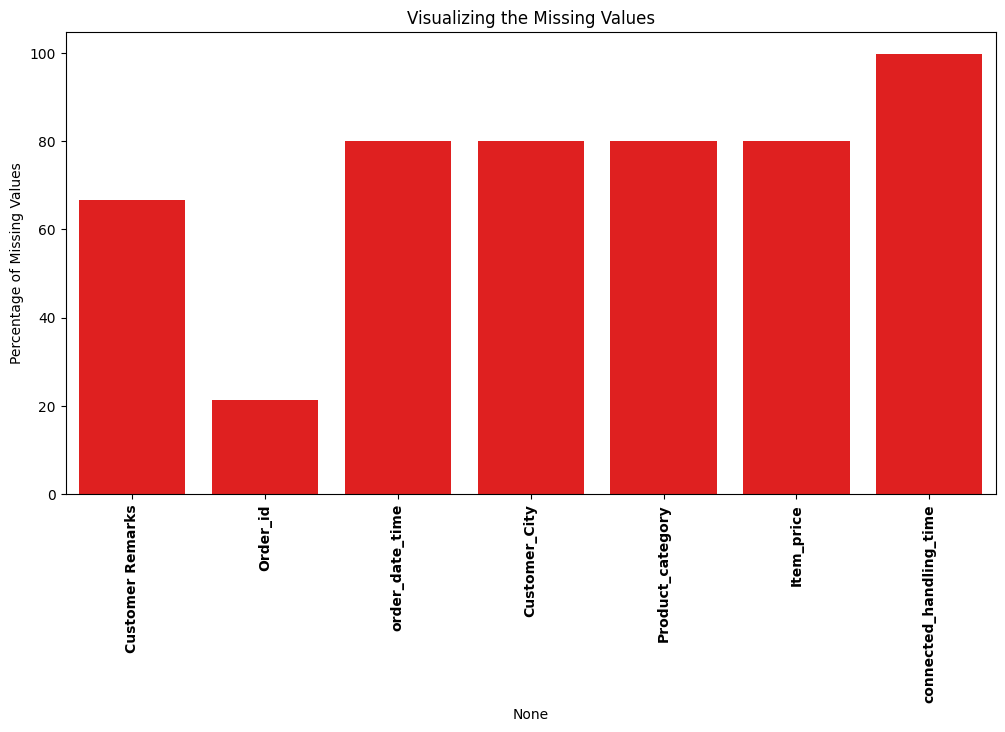

In [ ]:
# Visualizing the missing values

missing_percent = missing_percent[missing_percent > 0]  # Only columns with missing values

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values,color= 'red')
plt.xticks(rotation=90, fontweight = 'bold')
plt.ylabel('Percentage of Missing Values')
plt.title('Visualizing the Missing Values')
plt.show()


### What did you know about your dataset?

**Based on the initial exploration, here's what I know about your dataset:**

1. Size and Structure: The dataset contains 85,907 rows and 20 columns.

2. No Duplicate Values: There are no duplicate rows in the dataset.

3. Missing Values: Several columns have a significant percentage of missing values, notably connected_handling_time (almost 100%), Customer_City, order_date_time, Product_category, Item_price (around 80%), and Customer Remarks (around 66%). Order_id also has missing values (around 21%). The other columns are complete.

4. Data Types: The dataset primarily consists of object (string) type columns, with a few numerical columns (Item_price, connected_handling_time, and CSAT Score).

5. Unique Values: Many columns have a high number of unique values (e.g., Unique id, Order_id, Customer Remarks, Customer_City, Agent_name), while others have a limited number of distinct categories (channel_name, category, Product_category, Tenure Bucket, Agent Shift, CSAT Score).

6. CSAT Score Distribution: The CSAT Score is an integer ranging from 1 to 5. The describe() method shows that the average CSAT is around 4.24, with the majority of scores likely being 4 or 5, as suggested by the 75th percentile being 5.

7. Item Price Distribution: The Item_price column has a wide range, from 0 to 164,999, with a mean of around 5660.

8. Missing Value Visualization: The bar plot clearly shows the columns with missing values and their respective percentages, visually confirming the extent of the data incompleteness in certain features.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
# Dataset Describe
data.drop('connected_handling_time', axis=1).describe()  # connected_handling_time | 99% of the data is missing


,Item_price,CSAT Score
count,17206.000000,85907.000000
mean,5660.774846,4.242157
std,12825.728411,1.378903
min,0.000000,1.000000
25%,392.000000,4.000000
50%,979.000000,5.000000
75%,2699.750000,5.000000
max,164999.000000,5.000000


### Variables Description

1. Unique id – Unique identifier for each record

2. Channel name – Name of the customer service channel

3. Category – Category of the interaction

4. Sub-category – Sub-category of the interaction
5. Customer Remarks – Feedback provided by the customer
6. Order id – Identifier for the order associated with the interaction
7. Order date time – Date and time of the order
8. Issue reported at – Timestamp when the issue was reported
9. Issue responded – Timestamp when the issue was responded to
10. Survey response date – Date of the customer survey response
11. Customer city – City of the customer
12. Product category – Category of the product
13. Item price – Price of the item
14. Connected handling time – Time taken to handle the interaction
15. Agent name – Name of the customer service agent
16. Supervisor – Name of the supervisor
17. Manager – Name of the manager
18. Tenure Bucket – Bucket categorizing agent tenure
19. Agent Shift – Shift timing of the agent
20. CSAT Score – Customer Satisfaction (CSAT) score

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

,0
Unique id,85907
channel_name,3
category,12
Sub-category,57
Customer Remarks,18231
Order_id,67675
order_date_time,13766
Issue_reported at,30923
issue_responded,30262
Survey_response_Date,31


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Convert datetime columns

data['Issue_reported_at'] = pd.to_datetime(data['Issue_reported at'], format='%d/%m/%Y %H:%M', dayfirst=True, errors='coerce')

data['issue_responded'] = pd.to_datetime(data['issue_responded'], format='%d/%m/%Y %H:%M', dayfirst=True, errors='coerce')

data['Survey_response_Date'] = pd.to_datetime(data['Survey_response_Date'], format='%d-%b-%y', dayfirst=True, errors='coerce')


In [ ]:
# Response time in minutes | how much time taken to resond to the customer
data['response_time_mins'] = (data['issue_responded'] - data['Issue_reported_at']).dt.total_seconds() / 60


In [ ]:
data['response_time_mins'].describe()

,response_time_mins
count,85907.000000
mean,136.886610
std,592.528551
min,-1437.000000
25%,2.000000
50%,5.000000
75%,35.000000
max,5758.000000


In [ ]:
# REMOVE THE RESPONSE TIME < 0
data.loc[data['response_time_mins'] < 0, 'response_time_mins'] = None


In [ ]:
# Resolution lag between reported issue and survey date (in hours/days) | how much time taken to solve the issue after responding
data['resolution_days'] = (data['Survey_response_Date'].dt.normalize() - data['Issue_reported_at'].dt.normalize()).dt.total_seconds() / (24*3600)

# dt.normalize() removes the time part of a datetime and keeps only the date.

In [ ]:
data['resolution_days'].value_counts()

,count
resolution_days,
0.0,78087
1.0,6034
2.0,1171
3.0,455
4.0,160


In [ ]:
# get the hour,day_name, day of the week number from the when the issue was reported
data['issue_day_of_week'] = data['Issue_reported_at'].dt.dayofweek
data['issue_day_name'] = data['Issue_reported_at'].dt.day_name()
data['issue_hour'] = data['Issue_reported_at'].dt.hour

In [ ]:
# find weathe the issue reported on weekend or not

data['is_weekend'] = data['issue_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
# divide the day into sections ( at what section of time we goth thw report)
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data['time_of_day'] = data['issue_hour'].apply(time_of_day)



### What all manipulations have you done and insights you found?

**Data Manipulations:**

1. Datetime Conversion: Converted Issue_reported at, issue_responded, and Survey_response_Date to datetime for time-based calculations.

2. Response Time Calculation: Created response_time_mins as the difference between issue reported and responded times; replaced negative values with None.

3. Resolution Days: Calculated resolution_days as the difference between Survey_response_Date and Issue_reported at in days.

4. Temporal Features: Extracted day of week (issue_day_of_week, issue_day_name), hour (issue_hour), and weekend indicator (is_weekend).

5. Time of Day Categorization: Created time_of_day column with categories: Morning, Afternoon, Evening, Night.

6. Response Time Groups: Grouped response_time_mins into intervals like '0-5', '6-15', etc.

**Insights Found:**
*   **Response Time Distribution:** The majority of issues have a relatively fast response time, with the median response time being quite low. However, there is a wide range in response times, with some issues taking significantly longer to be responded to.
*   **Resolution Time Distribution:** Most issues are resolved on the same day they are reported, as indicated by the high count of 0 resolution days.
*   **Temporal Patterns:** There are variations in the number of issues reported based on the day of the week and hour of the day. This suggests potential peak times for customer support interactions.
*   **Impact of Response Time on CSAT (Preliminary):** Grouping response times reveals a potential trend where faster response times might be associated with higher CSAT scores, although further analysis is needed to confirm this.
*   **Distribution of Issues by Time of Day:** The distribution of issues across different times of the day highlights when support resources are most in demand.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

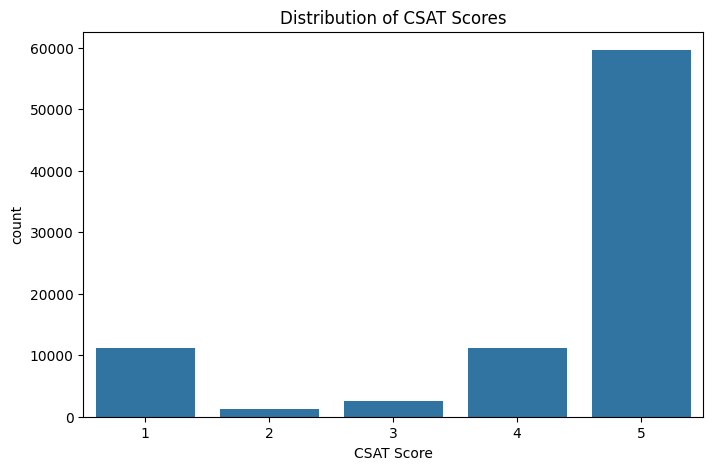

In [ ]:
# csat distrabution
plt.figure(figsize=(8,5)) #(width,height)
sns.countplot(x='CSAT Score', data=data)
plt.title('Distribution of CSAT Scores')
plt.show()


##### 1. Why did you pick the specific chart?

I picked the countplot for Chart 1 because it's the most straightforward way to visualize the distribution of a single categorical variable CSAT Score. It quickly shows how many customers fall into each CSAT category (1 through 5), making it easy to see which scores are most common.

##### 2. What is/are the insight(s) found from the chart?

*   **High Proportion of Satisfied Customers:** The chart clearly shows that CSAT scores of 4 and 5 are the most frequent, with CSAT 5 being the most dominant. This indicates that a large majority of customers are satisfied with their support experience.

While there are customers with lower CSAT scores (1, 2, and 3), their numbers are significantly lower compared to those with high scores. This suggests that while overall customer satisfaction is positive, there are still areas for improvement to address the causes of lower satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

*   **High Overall Satisfaction:** The high proportion of CSAT scores of 4 and 5 is a positive indicator. This suggests the current customer service efforts are largely effective and can be a foundation for building stronger customer loyalty.
*   **Identify Strengths:** By understanding what contributes to the high satisfaction scores (e.g., specific agent behaviors, resolution processes for common issues), the business can reinforce these strengths and replicate them across the support team.

**Insights that could lead to negative growth:**

*   **Presence of Lower CSAT Scores:** While fewer in number, the existence of CSAT scores of 1, 2, and 3 indicates that a segment of customers is dissatisfied. If the root causes of this dissatisfaction are not identified and addressed, these negative experiences can lead to:
    *   **Customer Churn:** Dissatisfied customers are more likely to stop using the service.
    *   **Negative Word-of-Mouth:** Unhappy customers may share their negative experiences with others, damaging the brand's reputation and hindering new customer acquisition.
    *   **Increased Support Costs:** Repeated issues from dissatisfied customers can lead to higher operational costs.

Therefore, while the overall picture is positive, focusing on the reasons behind the lower CSAT scores is crucial to prevent negative growth and ensure consistent customer satisfaction.

#### Chart - 2

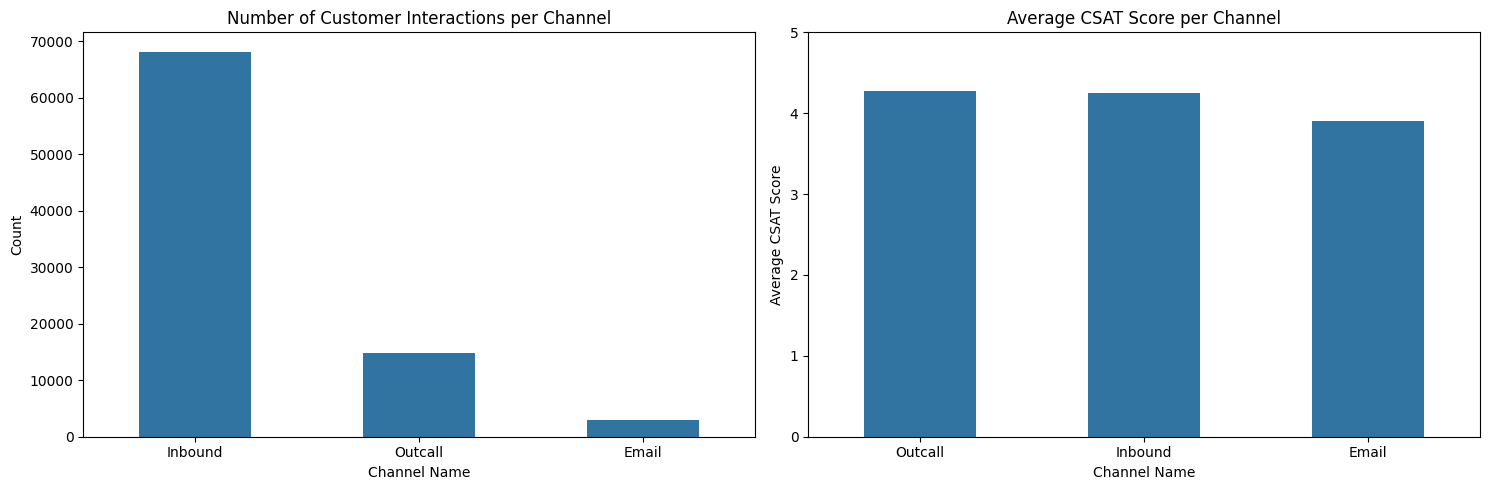

In [ ]:
# sub plots
fig, axes = plt.subplots(1, 2, figsize=(15,5))  # 1, 2 = 1 row , 2 columns

# Count of customers per channel
sns.countplot(x='channel_name',data=data,order=data['channel_name'].value_counts().index,ax=axes[0],width=0.5)
axes[0].set_title('Number of Customer Interactions per Channel')
axes[0].set_xlabel('Channel Name')
axes[0].set_ylabel('Count')

# Average CSAT per channel
channel_csat = data.groupby('channel_name')['CSAT Score'].mean().reset_index()
sns.barplot(
    x='channel_name',
    y='CSAT Score',
    data=channel_csat,
    order=channel_csat.sort_values('CSAT Score', ascending=False)['channel_name'],
    ax=axes[1],
    width=0.5
)
axes[1].set_title('Average CSAT Score per Channel')
axes[1].set_xlabel('Channel Name')
axes[1].set_ylabel('Average CSAT Score')
axes[1].set_ylim(0,5)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I used side-by-side bar plots to visualize and compare two different metrics (number of customer interactions and average CSAT score) across the different `channel_name` categories. This layout allows for a clear comparison of channel performance based on both volume and customer satisfaction. It makes it easy to see which channels are used most frequently and how satisfaction varies between them.

##### 2. What is/are the insight(s) found from the chart?

1.  **Channel Volume:** Inbound is the channel with the highest number of customer interactions, significantly more than Outcall and Email. This suggests that customers primarily initiate contact through inbound methods.
2.  **Average CSAT by Channel:** While Inbound handles the most volume, the average CSAT scores are relatively similar across Inbound and Outcall. Email has a slightly lower average CSAT compared to the other two channels.
3.  **Outcall Efficiency:** Outcall, despite having fewer interactions, shows a slightly higher average CSAT than Inbound, which could indicate more targeted or effective communication in outbound scenarios.
4.  **Email Performance:** The lower average CSAT for Email, combined with its low volume, might suggest issues with response times, clarity, or resolution quality in this channel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

*   **Optimizing High-Volume Channels:** Recognizing that "Inbound" is the primary channel for customer contact allows for focused efforts on optimizing the efficiency and quality of service within this channel. This could involve ensuring adequate staffing, improving self-service options, or streamlining workflows to handle the high volume effectively.
*   **Improving Lower-Performing Channels:** The lower average CSAT for "Email" suggests areas for improvement. Investigating the reasons behind this (e.g., response times, clarity of communication, resolution effectiveness) can lead to targeted interventions to boost satisfaction in this channel.
*   **Leveraging Strengths:** The slightly higher CSAT for "Outcall" despite lower volume could be analyzed to understand what contributes to this higher satisfaction and potentially apply those learnings to other channels.

**Insights that could lead to negative growth:**

*   **Neglecting High-Volume Channels:** Failing to adequately manage the high volume in the "Inbound" channel could lead to increased wait times, frustrated customers, and a decline in overall satisfaction.
*   **Ignoring Low CSAT Channels:** If the issues contributing to lower CSAT in the "Email" channel are not addressed, it could lead to a poor customer experience for those who prefer or are directed to this channel, potentially resulting in churn or negative reviews.
*   **Misallocating Resources:** Without understanding the volume and satisfaction levels across channels, resources might be misallocated, leading to inefficiencies and suboptimal customer service.

By using these insights to make data-driven decisions about channel strategy, businesses can improve customer satisfaction, optimize operations, and ultimately contribute to positive growth.

#### Chart - 3

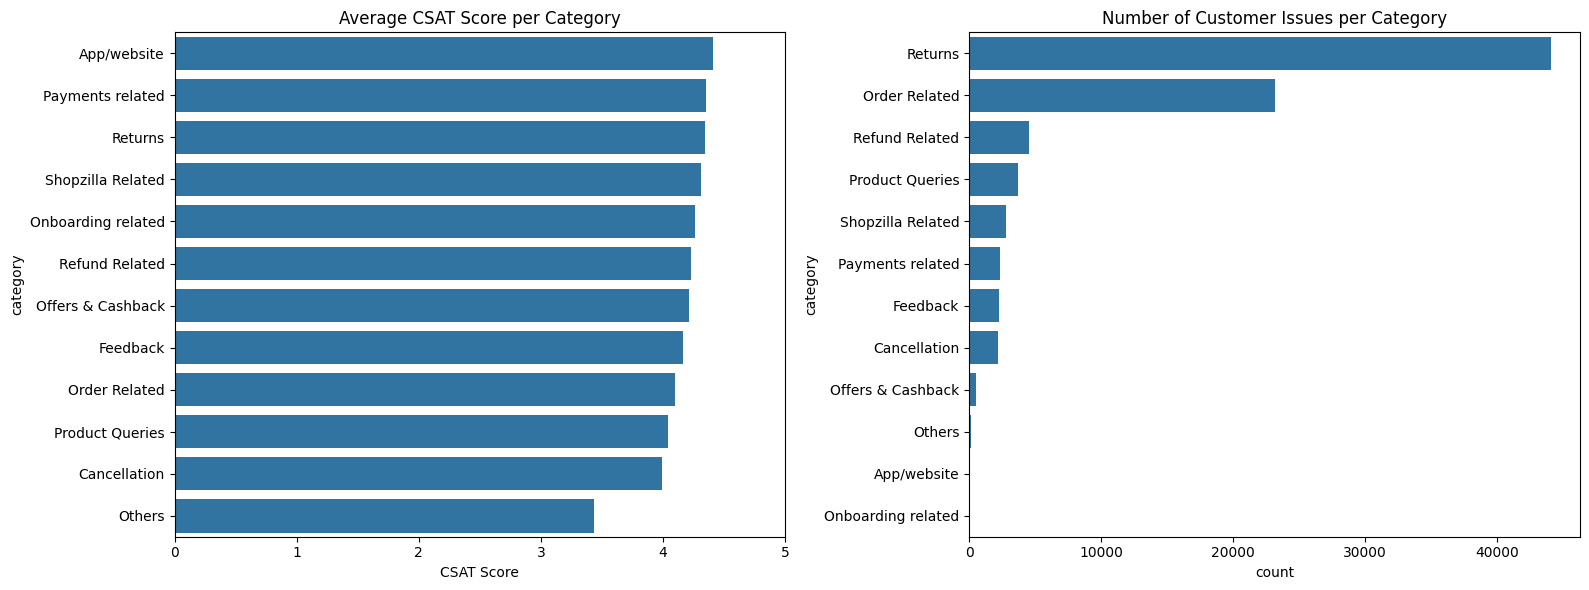

In [ ]:
# comparing CSAT score with with category

fig, axes = plt.subplots(1, 2, figsize=(16,6))

# Average CSAT per Category
category_csat = data.groupby('category')['CSAT Score'].mean().reset_index()
sns.barplot(x='CSAT Score', y='category', data=category_csat.sort_values('CSAT Score', ascending=False), ax=axes[0])
axes[0].set_title('Average CSAT Score per Category')
axes[0].set_xlim(0,5)

# Number of Customer Issues per Category
category_count = data['category'].value_counts().reset_index()
category_count.columns = ['category', 'count']
sns.barplot(x='count', y='category', data=category_count, ax=axes[1])
axes[1].set_title('Number of Customer Issues per Category')

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

I chose side-by-side bar charts to effectively visualize and compare two different metrics (Average CSAT Score and Number of Customer Issues) across the same categorical variable (Category). This allows for easy identification of categories with high or low CSAT and those with high or low issue volumes, and facilitates exploring potential relationships between issue type and customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

1.  **Issue Volume:** The "Returns" category has the highest number of customer issues, followed by "Order Related." This indicates these are the most frequent reasons customers contact support.
2.  **Average CSAT by Category:** While "Returns" and "Order Related" have high volume, their average CSAT scores are not the highest. Categories like "App/website", "Onboarding related", and "Payments related" have higher average CSAT scores, despite having much lower issue volumes.
3.  **Potential Relationship:** The charts suggest that categories with higher issue volumes might have slightly lower average CSAT, possibly due to the strain on resources or complexity of common issues in those areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Targeted Resource Allocation: Focus resources on high-volume categories like "Returns" and "Order Related" to improve efficiency and CSAT.

* Leverage High CSAT Categories: Learn from low-volume, high-CSAT categories ("App/website," "Onboarding," "Payments") to enhance practices across all areas.

* Process Improvement: Address high-volume areas with slightly lower CSAT through better training, automation, or workflow optimization.

* Enhanced Customer Experience: Efficient handling of frequent issues boosts satisfaction, loyalty, and reduces churn.

**Insights that could lead to negative growth:**

* Neglect High-Volume, Low-CSAT Areas: Ignoring issues in "Returns" or "Order Related" may harm satisfaction and brand reputation.

* Overlook Low-Volume Issues: Even low-volume issues with poor CSAT can negatively affect niche customer segments.

* Resource Strain: Insufficient resources in high-volume categories may increase response times, agent burnout, and decrease CSAT.

#### Chart - 4

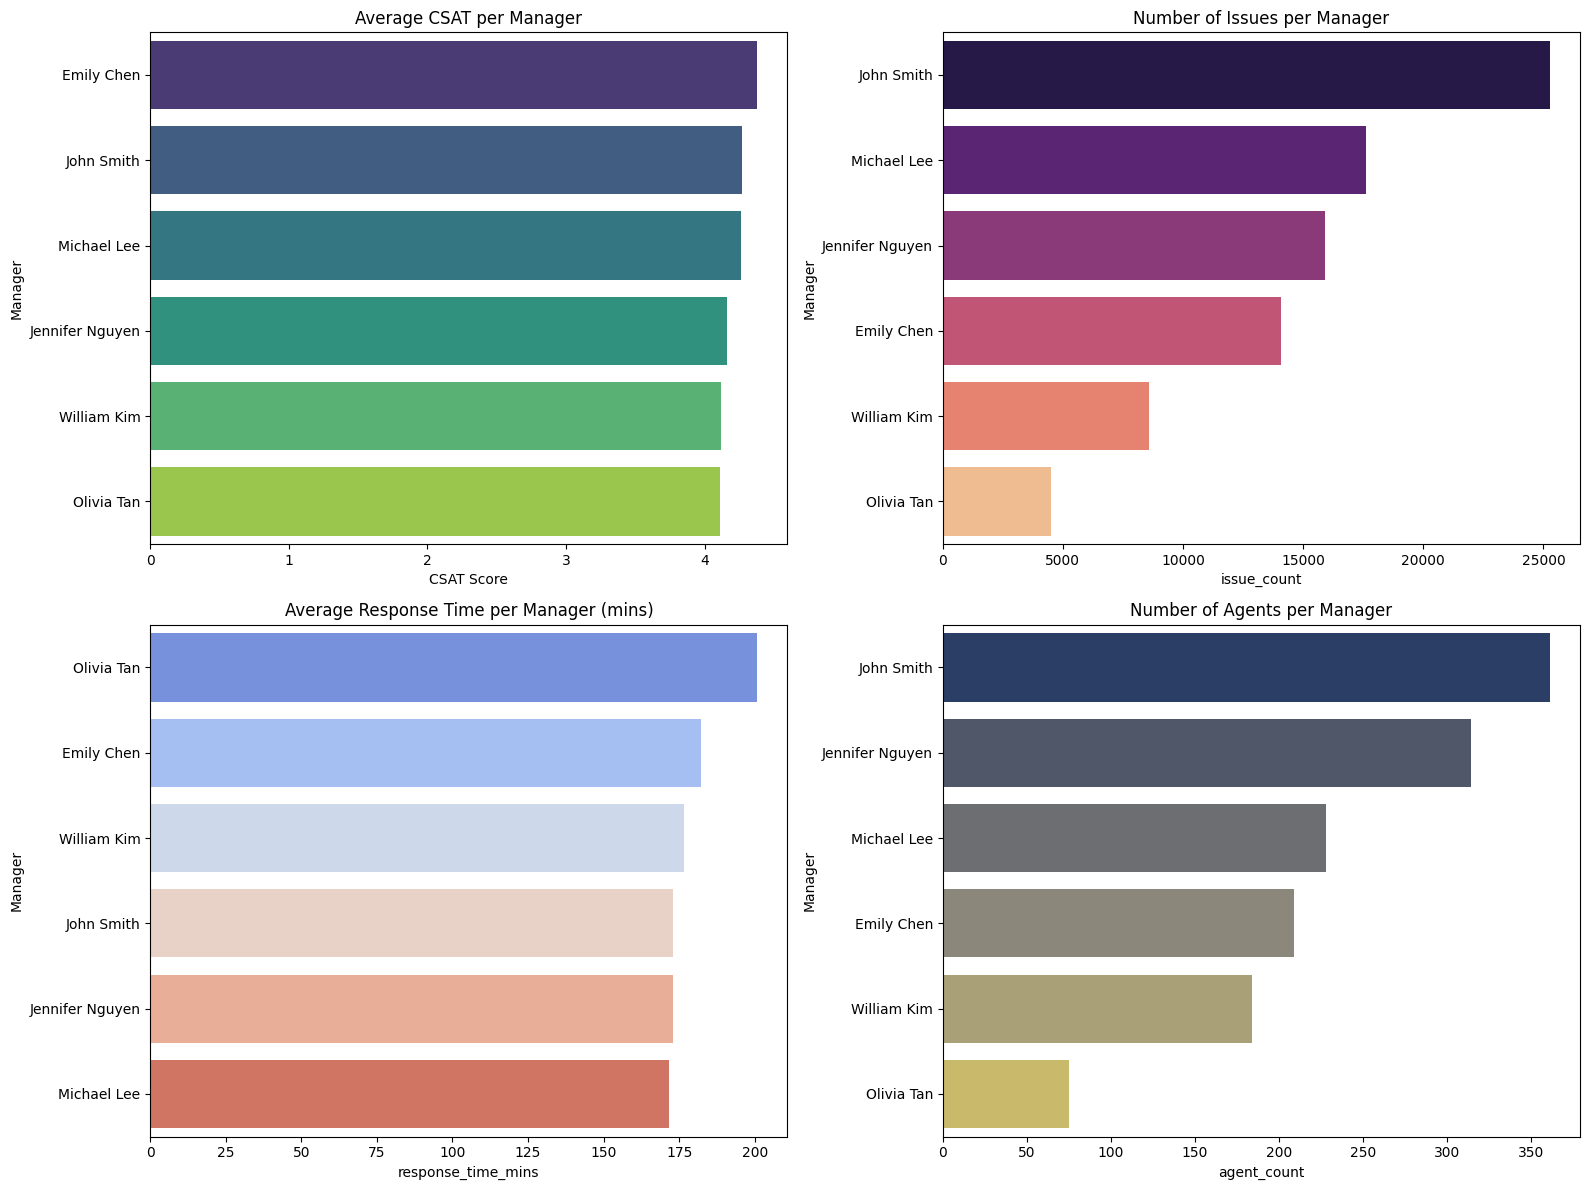

In [ ]:
# manager Performance
# Prepare data
manager_csat = data.groupby('Manager')['CSAT Score'].mean().reset_index().sort_values('CSAT Score', ascending=False)
manager_count = data.groupby('Manager')['Unique id'].count().reset_index().rename(columns={'Unique id': 'issue_count'}).sort_values('issue_count', ascending=False)
manager_response = data.groupby('Manager')['response_time_mins'].mean().reset_index().sort_values('response_time_mins', ascending=False)
agents_per_manager = data.groupby('Manager')['Agent_name'].nunique().reset_index().rename(columns={'Agent_name': 'agent_count'}).sort_values('agent_count', ascending=False)

# Set up 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1. Average CSAT per Manager
sns.barplot(x='CSAT Score', y='Manager', data=manager_csat, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Average CSAT per Manager')

# 2. Number of Issues per Manager
sns.barplot(x='issue_count', y='Manager', data=manager_count, ax=axes[0,1], palette='magma')
axes[0,1].set_title('Number of Issues per Manager')

# 3. Average Response Time per Manager
sns.barplot(x='response_time_mins', y='Manager', data=manager_response, ax=axes[1,0], palette='coolwarm')
axes[1,0].set_title('Average Response Time per Manager (mins)')

# 4. Number of Unique Agents per Manager
sns.barplot(x='agent_count', y='Manager', data=agents_per_manager, ax=axes[1,1], palette='cividis')
axes[1,1].set_title('Number of Agents per Manager')

plt.tight_layout()
plt.show()


In [ ]:
# manager = data.groupby('Manager').agg({'CSAT Score':'mean','Agent_name' : 'count','response_time':'mean','Unique id' : 'count'}).reset_index()
# manager.columns = ['MANAGER','AVG_CSAT_SCORE','NO_OF_AGENTS','AVG_RESPONSE_TIME','NO_OF_ISSUES']
# manager

In [ ]:
# # Set up 4 subplots
# fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# # 1. Average CSAT per Manager
# sns.barplot(x='AVG_CSAT_SCORE', y='MANAGER', data=manager, ax=axes[0,0], color='black')
# axes[0,0].set_title('Average CSAT per Manager', fontweight='bold')
# axes[0,0].set_xlabel('AVG_CSAT_SCORE', fontweight='bold')
# axes[0,0].set_ylabel('MANAGER', fontweight='bold')

# # 2. Number of Issues per Manager
# sns.barplot(x='NO_OF_ISSUES', y='MANAGER', data=manager, ax=axes[0,1], color='green')
# axes[0,1].set_title('Number of Issues per Manager', fontweight='bold')
# axes[0,1].set_xlabel('NO_OF_ISSUES', fontweight='bold')
# axes[0,1].set_ylabel('MANAGER', fontweight='bold')

# # 3. Average Response Time per Manager
# sns.barplot(x='AVG_RESPONSE_TIME', y='MANAGER', data=manager, ax=axes[1,0], color='blue')
# axes[1,0].set_title('Average Response Time per Manager (mins)', fontweight='bold')
# axes[1,0].set_xlabel('AVG_RESPONSE_TIME', fontweight='bold')
# axes[1,0].set_ylabel('MANAGER', fontweight='bold')

# # 4. Number of Unique Agents per Manager
# sns.barplot(x='NO_OF_AGENTS', y='MANAGER', data=manager, ax=axes[1,1], color='red')
# axes[1,1].set_title('Number of Agents per Manager', fontweight='bold')
# axes[1,1].set_xlabel('NO_OF_AGENTS', fontweight='bold')
# axes[1,1].set_ylabel('MANAGER', fontweight='bold')

# # Make tick labels bold
# for ax in axes.flat: # axes is a 2×2 array of subplot axes. | .flat turns that 2D array into a 1D iterator.
#     ax.tick_params(axis='both', labelsize=10, labelcolor='black')
#     for label in ax.get_xticklabels() + ax.get_yticklabels():
#         label.set_fontweight('bold')
# # ax → one Axes object (one subplot).
# # .tick_params() → method that lets you customize the ticks on that subplot.
# plt.tight_layout()
# plt.show()


##### 1. Why did you pick the specific chart?

I used multiple bar charts in a 2x2 grid to show how different aspects of manager performance (CSAT, issue count, response time, and number of agents) relate to each manager. This layout makes it easy to compare managers side-by-side across these key metrics.

##### 2. What is/are the insight(s) found from the chart?

* Emily Chen’s High CSAT: Her team achieves the highest average CSAT despite handling fewer issues, reflecting strong service quality.

* John Smith & Michael Lee – High Volume: Their teams handle the most issues with slightly lower, but still strong, CSAT, showing effective high-volume management.

* Response Time Differences: Olivia Tan’s team has the longest average response time, which may need investigation, though CSAT is not the lowest.

* Agent Distribution Impact: Variation in team size may influence issue handling, response times, and CSAT outcomes

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

*   **Targeted Training and Support:** Lower CSAT in the "On Job Training" bucket suggests newer agents need additional guidance to improve service quality.
*   **Leveraging Experienced Agents:** High CSAT in the "61-90" and ">90" day buckets highlights the value of experienced agents for mentoring and handling complex issues.
*   **Optimizing Agent Placement:** CSAT by tenure can guide assigning agents to cases based on experience to maximize satisfaction.
*   **Improved Agent Retention:** Supporting newer agents boosts confidence, performance, and retention.

**Insights that could lead to negative growth :**

*   **Higher Dissatisfaction from New Agents:** Ignoring training needs for newer agents may reduce satisfaction and harm brand reputation.
*   **Underutilization of Experienced Agents:** Not leveraging seasoned agents for complex cases or mentoring may limit potential CSAT gains.
*   **Agent Burnout:** Imbalanced workloads, especially for newer agents, can lead to fatigue and higher attrition.

**Focusing on training newer agents and effectively using experienced agents improves CSAT and efficiency, while neglecting these areas risks customer dissatisfaction and negative business impact.**

#### Chart - 5

     Tenure Bucket  CSAT Score
0             0-30    4.258791
1            31-60    4.296185
2            61-90    4.346536
3              >90    4.273190
4  On Job Training    4.145242
     Tenure Bucket  Agent_name
0             0-30         139
1            31-60         148
2            61-90          90
3              >90         476
4  On Job Training         518


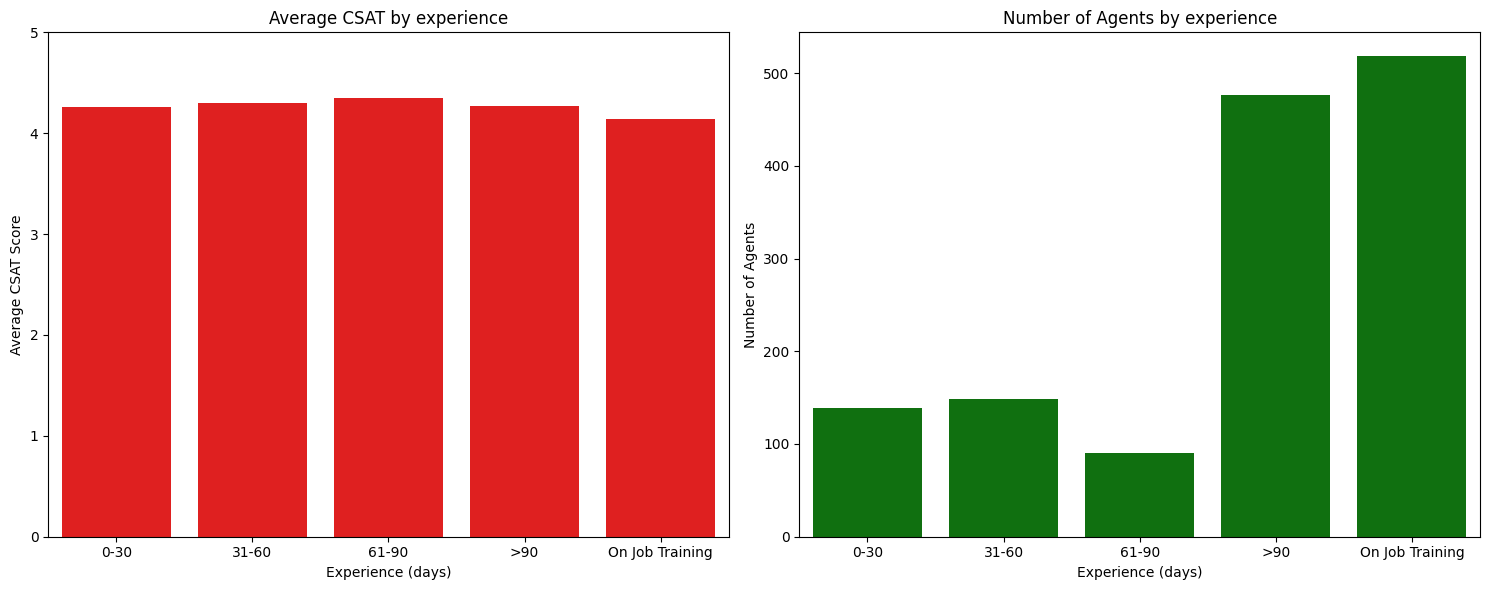

In [ ]:
# make order of experience
experience_order = ['0-30','31-60','61-90','>90','On Job Training']

# Prepare data keep x column in order... here i am getting order without mentioning

# tenure_csat = data.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()
# tenure_csat['Tenure Bucket'] = pd.Categorical(tenure_csat['Tenure Bucket'], categories=experience_order, ordered=True)
# tenure_csat = tenure_csat.sort_values('Tenure Bucket')
# tenure_count = data.groupby('Tenure Bucket')['Agent_name'].nunique().reset_index()
# tenure_count['Tenure Bucket'] = pd.Categorical(tenure_count['Tenure Bucket'], categories=experience_order, ordered=True)
# tenure_count = tenure_count.sort_values('Tenure Bucket')

tenure_csat = data.groupby('Tenure Bucket')['CSAT Score'].mean().reset_index()
print(tenure_csat)

tenure_count = data.groupby('Tenure Bucket')['Agent_name'].nunique().reset_index()
print(tenure_count)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Plot Average CSAT
sns.barplot(x='Tenure Bucket', y='CSAT Score', data=tenure_csat, ax=axes[0], color='red')
axes[0].set_title('Average CSAT by experience')
axes[0].set_xlabel('Experience (days)')
axes[0].set_ylabel('Average CSAT Score')
axes[0].set_ylim(0,5)

# Plot Number of Agents
sns.barplot(x='Tenure Bucket', y='Agent_name', data=tenure_count, ax=axes[1], color='green')
axes[1].set_title('Number of Agents by experience')
axes[1].set_xlabel('Experience (days)')
axes[1].set_ylabel('Number of Agents')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. Clear Comparison Across Categories: Separate bar plots make it easy to compare average CSAT and agent counts across different experience levels.

Highlighting Different Metrics: Each plot focuses on one metric, showing clearly how CSAT or agent distribution varies by experience.

Side-by-Side Analysis: Placing the plots together allows quick visual comparison, revealing potential relationships between experience and CSAT or agent numbers.

Simplicity and Readability: The approach is straightforward, making insights about experience, satisfaction, and agent distribution easy to understand.

##### 2. What is/are the insight(s) found from the chart?

1. CSAT Trends: Average CSAT is high across all experience buckets, peaking at 61-90 days and lowest for On Job Training.

2. Agent Distribution: Most agents are in >90 days and On Job Training, with fewer in 61-90 days despite higher CSAT.

3. Insight: Experienced agents tend to have slightly higher satisfaction, but overall CSAT is strong across all experience levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Targeted Training and Support: Lower CSAT in the "On Job Training" bucket suggests newer agents need additional guidance to improve service quality.

* Leveraging Experienced Agents: High CSAT in the "61-90" and ">90" day buckets highlights the value of experienced agents for mentoring and handling complex issues.

* Optimizing Agent Placement: CSAT by tenure can guide assigning agents to cases based on experience to maximize satisfaction.

* Improved Agent Retention: Supporting newer agents boosts confidence, performance, and retention.

**Insights that could lead to negative growth :**

* Higher Dissatisfaction from New Agents: Ignoring training needs for newer agents may reduce satisfaction and harm brand reputation.

* Underutilization of Experienced Agents: Not leveraging seasoned agents for complex cases or mentoring may limit potential CSAT gains.

* Agent Burnout: Imbalanced workloads, especially for newer agents, can lead to fatigue and higher attrition.

**Focusing on training newer agents and effectively using experienced agents improves CSAT and efficiency, while neglecting these areas risks customer dissatisfaction and negative business impact.**

#### Chart - 6

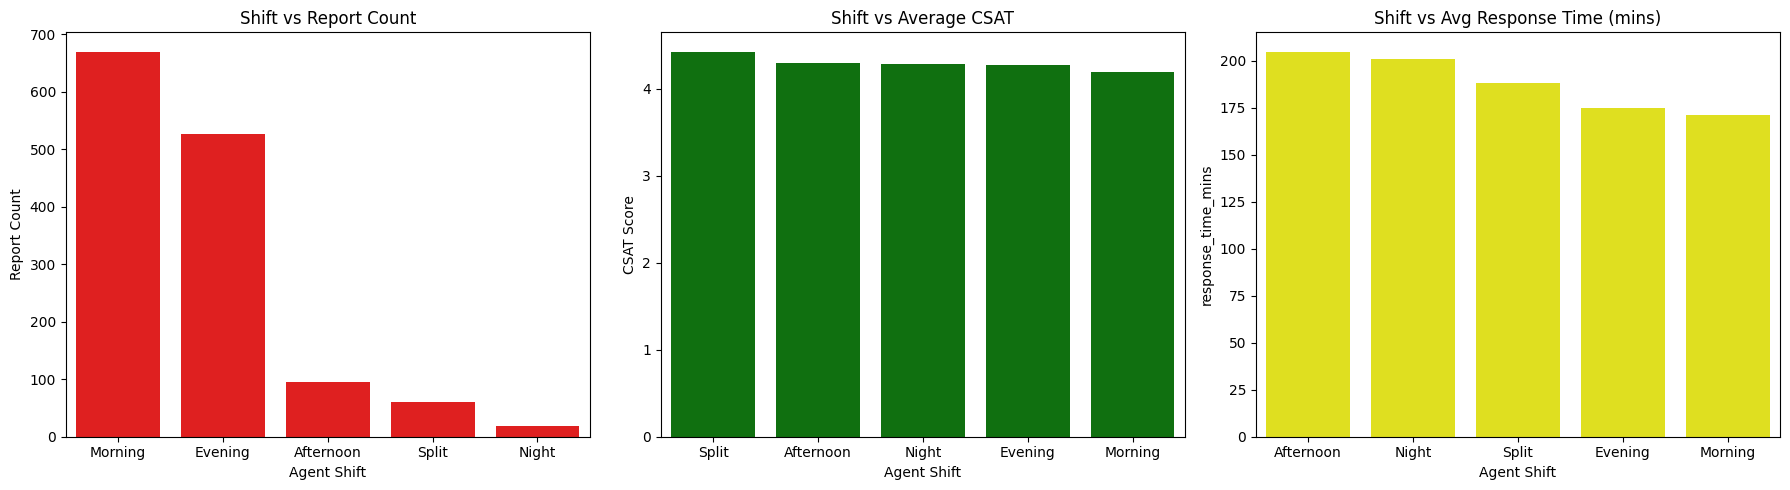

In [ ]:
# 1. Count of reports per shift
shift_count = data.groupby('Agent Shift')['Agent_name'].nunique().reset_index()
shift_count.columns = ['Agent Shift', 'Report Count']

# 2. Average CSAT per shift
shift_csat = data.groupby('Agent Shift')['CSAT Score'].mean().reset_index()

# 3. Average response time per shift
shift_response = data.groupby('Agent Shift')['response_time_mins'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Shift vs Report Count (Red)
sns.barplot(x='Agent Shift', y='Report Count',
            data=shift_count.sort_values('Report Count', ascending=False),
            ax=axes[0], color='red')
axes[0].set_title('Shift vs Report Count')

# Shift vs CSAT Score (Green)
sns.barplot(x='Agent Shift', y='CSAT Score',
            data=shift_csat.sort_values('CSAT Score', ascending=False),
            ax=axes[1], color='green')
axes[1].set_title('Shift vs Average CSAT')

# Shift vs Response Time (Blue)
sns.barplot(x='Agent Shift', y='response_time_mins',
            data=shift_response.sort_values('response_time_mins', ascending=False),
            ax=axes[2], color='yellow')
axes[2].set_title('Shift vs Avg Response Time (mins)')

plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

1. Clear Comparison Across Categories: Separate bar plots make it easy to compare counts and averages across different Agent Shifts without clutter.

2. Highlighting Different Metrics: Each plot focuses on one metric—Report Count, Average CSAT, or Average Response Time—allowing independent analysis of shift performance.

3. Side-by-Side Analysis: Arranging the plots together helps identify trends, such as whether shifts with higher report counts also have lower CSAT or longer response times.

4. Simplicity and Readability: This approach is straightforward and makes performance differences by shift immediately clear

##### 2. What is/are the insight(s) found from the chart?

1. High Volume Shifts: Morning and Evening handle the majority of reports.

2. Low Volume Shifts: Split and Night shifts have fewer reports.

3. CSAT Differences: Split shift has the highest average CSAT, followed by Afternoon and Night; Morning and Evening are slightly lower.

4. Response Time Variation: Afternoon and Night shifts have longer response times, Morning and Evening are faster, and Split is moderate.

**Busiest shifts have slightly lower CSAT but faster responses, while lower-volume shifts achieve higher CSAT with longer response times, indicating a trade-off between volume, speed, and satisfaction.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Optimized Staffing: Understanding high-volume shifts (Morning and Evening) helps allocate more agents to manage workload and maintain service quality.

* Targeted Performance Improvement: Comparing CSAT and response times highlights underperforming shifts, guiding training or workflow improvements.

* Resource Allocation: Insights can inform allocation of supervisors and specialized support during critical shifts.

* Improved Agent Satisfaction: Balancing workload and providing targeted support can reduce burnout and enhance customer interactions.

**Insights that could lead to negative growth :**

* Dissatisfaction During Peak Times: Poorly managed Morning and Evening shifts can increase wait times and lower CSAT, risking customer churn.

* Neglecting Lower Volume Shifts: Long response times in Afternoon and Night shifts can negatively affect customers needing support during these hours.

* Unaddressed Performance Gaps: Ignoring shifts with lower CSAT or longer response times can reduce overall service quality and damage reputation.

* Agent Attrition: Uneven workload and lack of support may lead to higher agent turnover and increased recruitment/training costs.

**Analyzing shift performance helps optimize operations, improve service quality, and ensure customer satisfaction. Ignoring discrepancies can harm both customer experience and business growth.**

#### Chart - 7

In [ ]:
# DIVIDE RESPONSE TIME INTO GROUPS

def response_time_group(rt):
    if rt <= 5:
        return '0-5'
    elif rt <= 15:
        return '6-15'
    elif rt <= 30:
        return '16-30'
    elif rt <= 60:
        return '31-60'
    elif rt <= 120:
        return '61-120'
    elif rt <= 240:
        return '121-240'
    elif rt <= 480:
        return '241-480'
    elif rt <= 960:
        return '481-960'
    else:
        return '961+'

# Apply the function to the response_time_mins column
data['response_time_group'] = data['response_time_mins'].apply(response_time_group)


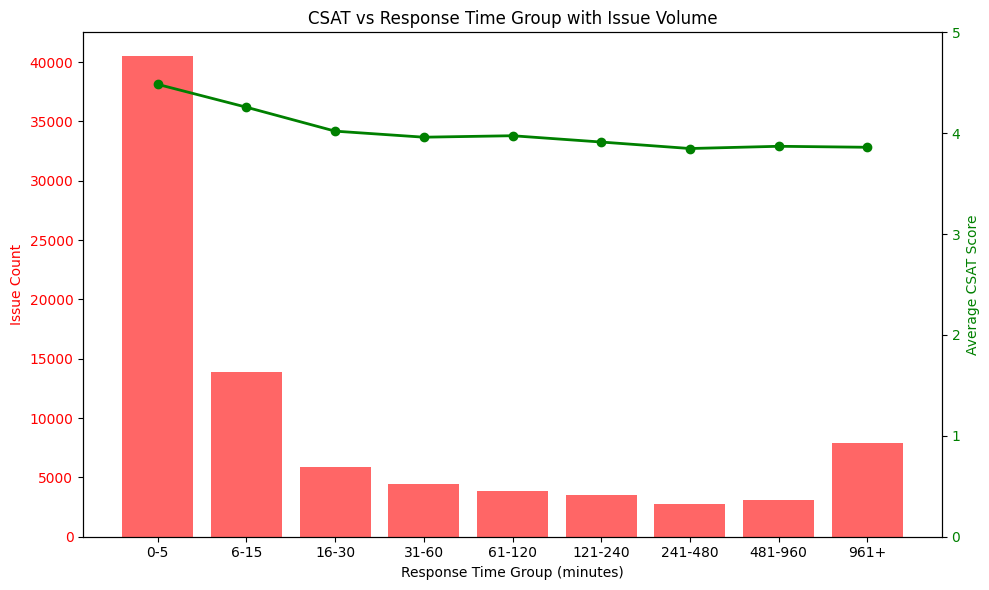

In [ ]:
# Define the order of response time groups
group_order = ['0-5','6-15','16-30','31-60','61-120',
               '121-240','241-480','481-960','961+']

# Group stats
resp_stats = data.groupby('response_time_group').agg(avg_csat=('CSAT Score', 'mean'),issue_count=('response_time_group', 'size')).reset_index()

# csat_graph = data.groupby('response_time_group').agg({'CSAT Score':'mean','Unique id':'count'}).reset_index()
# csat_graph.columns = ['response_time_group','avg_CSAT Score','report_count']
# csat_graph

# Convert to categorical and sort
resp_stats['response_time_group'] = pd.Categorical(resp_stats['response_time_group'],categories=group_order,ordered=True)
resp_stats = resp_stats.sort_values('response_time_group')


fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for issue counts
ax1.bar(resp_stats['response_time_group'], resp_stats['issue_count'],
        color='red', alpha=0.6, label="Issue Count") # alpha = transparance
ax1.set_xlabel("Response Time Group (minutes)")
ax1.set_ylabel("Issue Count", color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Secondary axis for CSAT line chart
ax2 = ax1.twinx()
ax2.plot(resp_stats['response_time_group'], resp_stats['avg_csat'],
         marker='o', color='green', linewidth=2, label="Avg CSAT")
ax2.set_ylabel("Average CSAT Score", color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_ylim(0,5)

# Title
plt.title("CSAT vs Response Time Group with Issue Volume")
fig.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

1. Compare Different Scales: Dual y-axes let you plot issue counts and CSAT scores together without one metric overpowering the other.

2. Identify Trends: Bars show issue distribution, while the line highlights how average CSAT changes with response time.

3. Overall Insight: Combines volume and satisfaction in one chart, making it easy to see correlations between response speed, issue volume, and customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

* Faster Response, Higher CSAT: The ‘0-5’ minute group has the highest average CSAT, showing quicker responses boost satisfaction.

* High Volume in Fast Responses: Most issues occur in the ‘0-5’ and ‘6-15’ minute groups.

* Lower CSAT for Delays: Longer response times (e.g., ‘241-480’, ‘481-960’, ‘961+’) have noticeably lower average CSAT.

* Moderate CSAT at Mid Response Times: ‘6-15’ and ‘16-30’ minute groups have substantial volume with slightly lower satisfaction.

**Quick responses drive higher customer satisfaction, while delays negatively impact CSAT, emphasizing the need to minimize response times.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Direct Improvement of Customer Satisfaction: Faster response times correlate with higher average CSAT, especially in high-volume groups like ‘0-5’ and ‘6-15’ minutes. Prioritizing speed can directly boost satisfaction.

* Optimized Resource Allocation: Knowing where most issues occur allows businesses to allocate more agents and tools to high-volume groups, maintaining quick responses during peak times.

* Targeted Process Improvement: Lower CSAT in longer response time groups highlights process inefficiencies or bottlenecks, guiding workflow improvements to reduce delays.

* Enhanced Agent Training: Identifying issue types with longer response times and lower CSAT can help design focused training for agents to handle these cases more efficiently.

**Insights that could lead to negative growth :**

* Increased Churn from Delays: Longer response times with lower CSAT can cause dissatisfied customers to leave.

* Negative Word-of-Mouth: Poor experiences from slow responses can harm the brand reputation and hinder new customer acquisition.

* Inefficient Operations: Unresolved delays indicate operational inefficiencies, increasing service costs and impacting overall performance.

**Chart the link between speed, volume, and satisfaction. Acting on these insights prioritizing fast responses, addressing delays, and optimizing resources can improve customer experience and drive growth. Ignoring slower response issues risks dissatisfaction, churn, and negative business impact**

#### Chart - 8

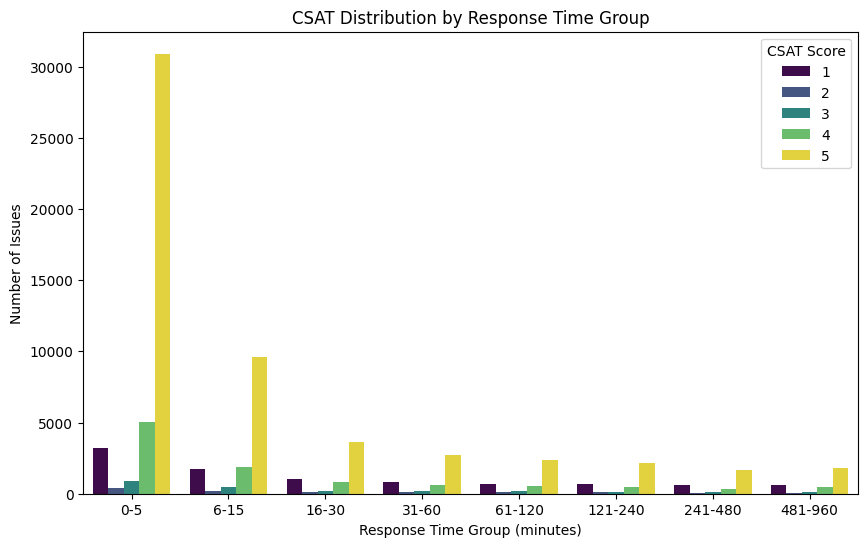

In [ ]:
# order for response_time_group
order = ['0-5', '6-15', '16-30', '31-60', '61-120', '121-240', '241-480', '481-960']

# make data
csat_dist = data.groupby(['response_time_group', 'CSAT Score']).size().reset_index(name='count')

# define order
csat_dist['response_time_group'] = pd.Categorical(csat_dist['response_time_group'],categories=order,ordered=True)

plt.figure(figsize=(10,6))
sns.barplot(x='response_time_group',y='count',hue='CSAT Score',data=csat_dist,palette='viridis')
plt.title("CSAT Distribution by Response Time Group")
plt.xlabel("Response Time Group (minutes)")
plt.ylabel("Number of Issues")
plt.legend(title="CSAT Score")
plt.show()


In [ ]:
# | Code Type                 | Needs `.sort_values()`? | Why                                                    |
# | ------------------------- | ----------------------- | ------------------------------------------------------ |
# | `sns.barplot(...)`        | ❌ No                    | Seaborn respects categorical order automatically       |
# | `plt.bar()` / `ax1.bar()` | ✅ Yes                   | Matplotlib plots rows as-is, ignores categorical order |


##### 1. Why did you pick the specific chart?

I chose a grouped bar chart because it effectively shows the distribution of CSAT Scores across different Response Time Groups. This makes it easy to compare how customer satisfaction varies with response time, highlighting which groups have higher proportions of satisfied customers (CSAT 4–5) versus dissatisfied customers (CSAT 1–3)

##### 2. What is/are the insight(s) found from the chart?

1. Faster Response = Higher CSAT: Response times in 0-5 and 6-15 minutes show a higher proportion of satisfied customers (CSAT 4–5).

2. Longer Response = More Dissatisfaction: As response times increase (481-960 minutes and above), lower CSAT scores (1–3) become more frequent.

3. High CSAT Dominance: CSAT 5 remains the most frequent across all groups, though slower responses slightly increase lower scores.

4. Volume & Satisfaction: High-volume response groups still maintain high satisfaction, indicating that quick handling drives positive CSAT.

**Summary: Faster responses clearly correlate with higher customer satisfaction, while delays increase the likelihood of lower CSAT scores.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Prioritize Fast Responses: Faster response times drive higher CSAT, so quick initial handling should be a priority.

* Identify Bottlenecks: Longer response times highlight process delays, enabling targeted workflow improvements.

* Set Performance Goals: Use insights to define response time targets for agents and teams.

* Boost Customer Loyalty: Quick, efficient issue resolution fosters positive experiences and repeat business.

**Insights that could lead to negative growth :**

* Dissatisfaction from Delays: Slow responses increase low CSAT scores, leading to churn and negative reviews.

* Brand Reputation Damage: Poor experiences can spread quickly online, affecting new customer acquisition.

* Inefficient Resource Allocation: Without proper staffing, long response times create backlogs and dissatisfaction.

**Summary: Reducing response times, especially in high-volume areas, improves satisfaction and loyalty. Ignoring delays risks customer dissatisfaction and negative business impact.**

#### Chart - 9

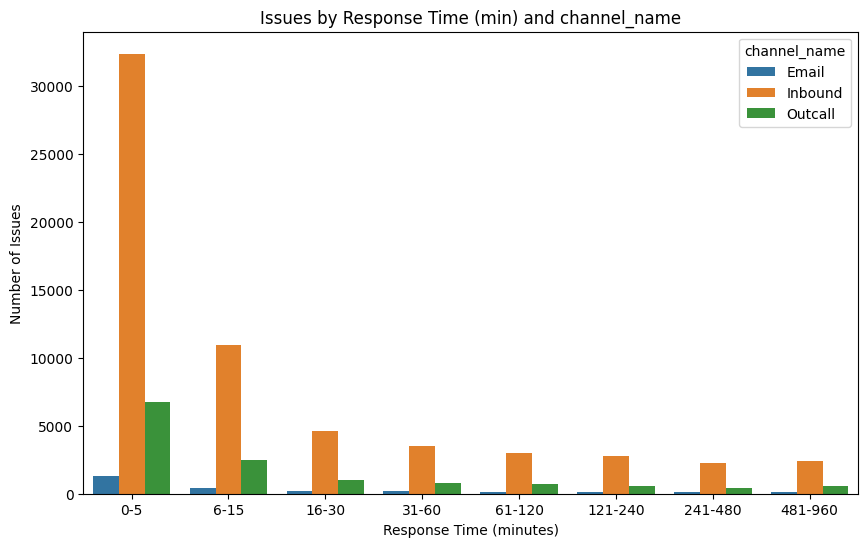

In [ ]:
# Define the desired order for response_time_group. make order for the x axis
order = ['0-5', '6-15', '16-30', '31-60', '61-120', '121-240', '241-480', '481-960']

# data for the graph
resp_channel = data.groupby(['response_time_group', 'channel_name']).size().reset_index(name='count')

# specify thr order order
resp_channel['response_time_group'] = pd.Categorical(resp_channel['response_time_group'],categories=order,ordered=True)


plt.figure(figsize=(10,6))
sns.barplot(x='response_time_group',y='count',hue='channel_name',data=resp_channel)
plt.title("Issues by Response Time (min) and channel_name")
plt.xlabel("Response Time (minutes)")
plt.ylabel("Number of Issues")
plt.legend(title="channel_name")
plt.show()




##### 1. Why did you pick the specific chart?

A grouped bar chart was chosen because it clearly compares issue counts across two categorical variables **response_time_group** and **channel_name**. It makes it easy to see patterns and differences between channels for each response time group

##### 2. What is/are the insight(s) found from the chart?

* Inbound Dominance: Most issues come through Inbound across all response times, especially 0–15 minutes.

* Outcall & Email: Outcall has moderate volume; Email has the lowest.

* Response Times: Majority of issues for all channels are resolved quickly, though some take longer.

 Inbound is the main channel, most issues are resolved fast, and Email sees minimal volume.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Business Impact:**

* Optimize Channels: Focus resources on high-volume channels like Inbound for efficiency.

* Improve Response: Identify bottlenecks and streamline workflows.

* Targeted Training: Use response time and CSAT insights to train agents.

* Resource Allocation: Assign agents based on issue distribution and peak times.

**Insights that could lead to negative growth :**

* Delays in high-volume channels (Inbound) can impact many customers.

* Neglecting low-volume channels (Email) may hurt niche customer segments.

* Long response times across channels can cause frustration and churn.

leveraging these insights improves operations and customer satisfaction; ignoring them risks dissatisfaction and growth loss.

#### Chart - 10

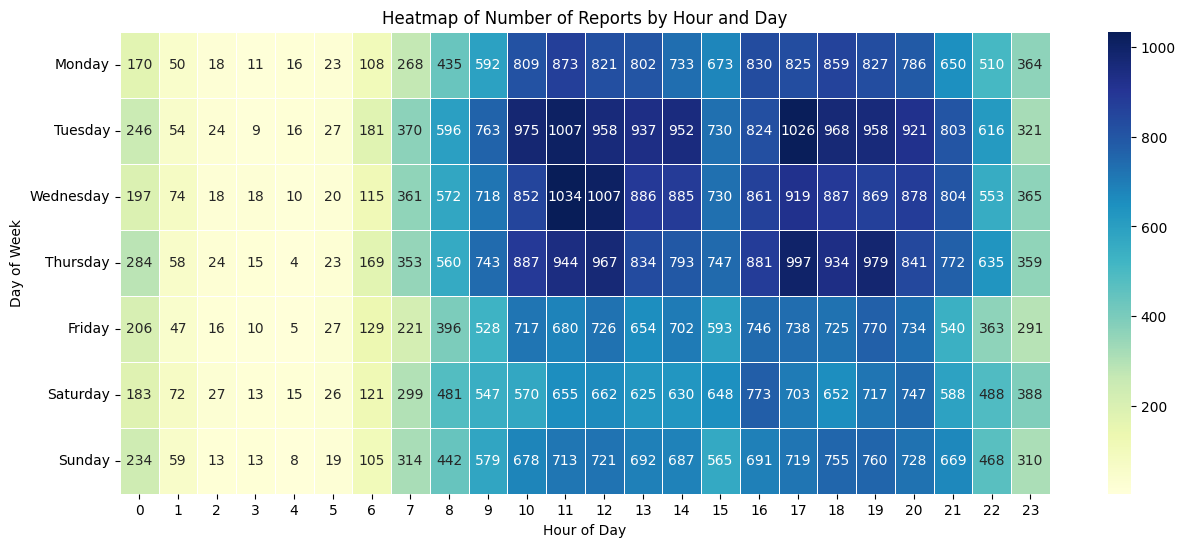

In [ ]:
# Chart - 10 visualization code

# Create a pivot table: rows = day of week, columns = hour, values = count of reports

hourly_heatmap = data.pivot_table(index='issue_day_name',columns='issue_hour',values='Unique id',aggfunc='count')

# sort days in order
days_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
hourly_heatmap = hourly_heatmap.reindex(days_order)

# Plot the heatmap
plt.figure(figsize=(15,6))
sns.heatmap(hourly_heatmap, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title("Heatmap of Number of Reports by Hour and Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()



##### 1. Why did you pick the specific chart?

I chose a heatmap  because it's an excellent way to visualize the relationship between two categorical variables (day of the week and hour of the day) and a quantitative variable (the number of reports). The color intensity makes it easy to spot patterns, like peak times or days for customer issues.

##### 2. What is/are the insight(s) found from the chart?

1. Peak Hours: The heatmap clearly shows that certain hours have a significantly higher number of reports than others. You can identify the specific hours of the day with the most intense colors.
2. Peak Days: Similarly, you can see which days of the week tend to have more reports overall.
3. Hourly Patterns by Day: The heatmap also allows you to see if the peak hours are consistent across all days or if there are variations. For example, weekdays might have different peak times compared to weekends.
4. Low Activity Periods: Conversely, the heatmap highlights times with very low report volume, indicated by lighter colors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**By identifying the peak hours and days for customer reports, businesses can:**

* Optimize Staffing: Allocate more agents during high-volume periods to reduce response times and improve customer satisfaction.
Improve Resource Allocation: Ensure that the necessary resources (like specific support teams or technical staff) are available when they are most needed.
* Proactive Planning: Anticipate busy periods and prepare accordingly, potentially reducing stress on agents and improving efficiency.

**There aren't necessarily insights that directly lead to "negative growth" from this chart, but failing to act on these insights could indirectly lead to negative outcomes, such as:**

* Increased Customer Frustration: If staffing isn't adjusted for peak times, customers may experience longer wait times, leading to lower CSAT scores.
Agent Burnout: Overworked agents during busy periods can lead to decreased quality of service and higher agent turnover.
* Missed Opportunities: Not being adequately staffed during peak sales periods could lead to missed opportunities for resolving pre-sales queries and converting customers.

So, while the chart itself doesn't show negative growth, the insights it provides are crucial for avoiding potential negative impacts by allowing for better operational planning.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the chart experiments, here are three hypothetical statements from the dataset:

1.  **Hypothesis 1 (Channels):** There is a significant difference in the average CSAT scores across different communication channels (Inbound, Outcall, Email).
2.  **Hypothesis 2 (Categories):** Customer issues related to "Returns" have a significantly different average CSAT score compared to issues related to "Product Queries".
3.  **Hypothesis 3 (Agent Tenure):** The average CSAT score varies significantly based on the agent's tenure bucket.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀): CSAT_Score is same accross all the different type of channels in the channel_name column.

2. Alternate Hypothesis (H₁): CSAT_Score is difference in atleast one channels in the channel_name column.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
from scipy.stats import f_oneway

# Get CSAT_scores by channel
inbound = data.loc[data['channel_name'] == 'Inbound','CSAT Score'].dropna()
outcall = data.loc[data['channel_name'] == 'Outcall','CSAT Score'].dropna()
email = data.loc[data['channel_name'] == 'Email','CSAT Score'].dropna()

# Run ANOVA test
f_stat, p_value = f_oneway(inbound, outcall, email)
print("p-value:", p_value)

p-value: 2.3194399795949356e-43


##### Which statistical test have you done to obtain P-Value?

ANOVA TEST

##### Why did you choose the specific statistical test?

We chose ANOVA because we are comparing the CSAT means across multiple channels, and ANOVA is best for testing differences between more than two group means.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀) : The mean CSAT for Returns is equal to the mean CSAT for Product Queries.

2. Alternative Hypothesis (H₁) : The mean CSAT for Returns is not equal to the mean CSAT for Product Queries

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import ttest_ind

# CSAT scores for two categories
returns = data.loc[data['category']=='Returns','CSAT Score'].dropna()
product_queries = data.loc[data['category']=='Product Queries','CSAT Score'].dropna()

# Two-sample t-test (two-tailed)
t_stat, p_val = ttest_ind(returns, product_queries)
print("Two-tailed p-value:", p_val)

Two-tailed p-value: 1.1837977201471158e-42


##### Which statistical test have you done to obtain P-Value?

t test

##### Why did you choose the specific statistical test?

We used a t-test because we are comparing the mean CSAT scores of two independent categories. It checks whether there is a significant difference between their means.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis (H₀) : Mean CSAT scores are the same across all Tenure Buckets.

2. Alternative Hypothesis (H₁) : At least one Tenure Bucket has a different mean CSAT score.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import f_oneway

# CSAT scores for each Tenure Bucket
group_0_30 = data.loc[data['Tenure Bucket']=='0-30','CSAT Score'].dropna()
group_31_60 = data.loc[data['Tenure Bucket']=='31-60','CSAT Score'].dropna()
group_61_90 = data.loc[data['Tenure Bucket']=='61-90','CSAT Score'].dropna()
group_above_90 = data.loc[data['Tenure Bucket']=='>90','CSAT Score'].dropna()

# ANOVA test
f_stat, p_val = f_oneway(group_0_30, group_31_60, group_61_90, group_above_90)
print("p-value:", p_val)


p-value: 8.894451549292777e-05


##### Which statistical test have you done to obtain P-Value?

ANOVA TEST

##### Why did you choose the specific statistical test?

We use one-way ANOVA because we are comparing the mean CSAT scores across multiple Tenure Buckets. It tests whether at least one group mean is different from the others

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

useful_cols = [
    'channel_name','category','Sub-category','Tenure Bucket',
    'Agent Shift','response_time_mins','resolution_days',
    'issue_day_of_week','issue_hour','is_weekend',
    'time_of_day','response_time_group','CSAT Score'
]

data_clean = data[useful_cols].copy()


In [ ]:
# Fill missing numeric values with median

data_clean['response_time_mins'] = data_clean['response_time_mins'].fillna(data_clean['response_time_mins'].median())

In [ ]:
# Convert CSAT Score into binary so that we get satisified ratins as 4,5 and 1,2,3 as unsatisfied ratings
data_clean['CSAT_Binary'] = data_clean['CSAT Score'].apply(lambda x: 1 if x >= 4 else 0)


#### What all missing value imputation techniques have you used and why did you use those techniques?

1. In this dataset, several columns had a high percentage of missing values, such as order_date_time (80%), Customer_City (80%), Product_category (80%), Item_price (80%), connected_handling_time (99%), and Customer_Remarks (~65%). Additionally, columns like order_id and Unique id are not useful for machine learning modeling. Therefore, I created a new subset called data_cleaned containing only the relevant features.

2. In data_cleaned, only response_time_mins had missing values (~3%), which I imputed using the median. Median imputation was chosen because it is robust to outliers, unlike the mean, which can be skewed by extreme values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
# Outlier handling using IQR for response_time_mins
q1 = data_clean['response_time_mins'].quantile(0.25)
q3 = data_clean['response_time_mins'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr  # ~99.3% of values lie within Q1 − 1.5×IQR and Q3 + 1.5×IQR.
upper = q3 + 1.5 * iqr
data_clean = data_clean[(data_clean['response_time_mins'] >= lower) & (data_clean['response_time_mins'] <= upper)]

# Outlier handling using IQR for resolution_days
q1 = data_clean['resolution_days'].quantile(0.25)
q3 = data_clean['resolution_days'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
data_clean = data_clean[(data_clean['resolution_days'] >= lower) & (data_clean['resolution_days'] <= upper)]



In [ ]:
# 1. IQR only looks at the middle 50% of data (between Q1 and Q3) and ignores the extremes.
# So it’s robust against extreme values.

# 2. Z-score measures how far each point is from the mean, in terms of standard deviations.
# If a point’s Z-score > 3 or < -3, it’s unusually far from the average.

##### What all outlier treatment techniques have you used and why did you use those techniques?

**For this dataset, I applied IQR (Interquartile Range) filtering to both response_time_mins and resolution_days.**

1. Technique: Calculated Q1 (25th percentile) and Q3 (75th percentile) for each column, then removed values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.

2. Reason: This method effectively removes extreme high and low values that skew the mean and could negatively affect model performance, while retaining most of the legitimate data
3. The dataset was filtered to retain only the rows where **response_time_mins and resolution_days** fell within this range, thereby removing outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# get the copy of cleaned data to make final encoded data set
data_encoded = data_clean.copy()

# Label encoding for ordinal-like categories
label_enc = LabelEncoder()
data_encoded['Tenure Bucket'] = label_enc.fit_transform(data_encoded['Tenure Bucket'])
data_encoded['Agent Shift'] = label_enc.fit_transform(data_encoded['Agent Shift'])
data_encoded['time_of_day'] = label_enc.fit_transform(data_encoded['time_of_day'])
data_encoded['response_time_group'] = label_enc.fit_transform(data_encoded['response_time_group'])

# One-hot encoding for nominal categories
data_encoded = pd.get_dummies(data_encoded, columns=['channel_name', 'category'], drop_first=True)


In [ ]:
#  pd.get_dummies() is a Pandas function used for one-hot encoding — it converts categorical columns (text labels) into numeric binary columns (0s and 1s).

#### What all categorical encoding techniques have you used & why did you use those techniques?

**Techniques used:**

1. Label Encoding – Applied to ordinal-like columns such as Tenure Bucket, Agent Shift, time_of_day, and response_time_group. This converts categories into numeric values while preserving their natural order.

          * Label Encoding is suitable for ordinal features because it maintains the order information.

2. One-Hot Encoding – Applied to nominal columns like channel_name and category where there is no inherent order. This creates binary columns for each category, preventing the model from assuming any ordinal relationship.

           * One-Hot Encoding is used for nominal features to avoid misleading numeric relationships between categories.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
# Drop unnecessary columns
drop_cols = ['Sub-category']
data_encoded.drop(columns=drop_cols, inplace=True, errors='ignore')


##### What all feature selection methods have you used  and why?

**Dropping Irrelevant Columns:**

* Columns Dropped: sub_catogory

* reson : We dropped Sub-category because it’s very detailed and the main category already gives the important information. Keeping it could make the model more complex and may not help predict better.

##### Which all features you found important and why?

**The features we found important for predicting customer satisfaction (CSAT) are:**

1. **category –** Different types of customer issues (e.g., Returns, Product Queries, Order Related) can have varying levels of complexity and resolution difficulty, which directly impacts CSAT.

2. **Tenure Bucket –** The experience level or tenure of the agent handling the issue can influence the quality of service provided. More experienced agents may resolve issues faster and more efficiently.

3. **Agent Shift –** The time period when an agent is working (morning, evening, split) can affect workload and response quality, impacting satisfaction.

4. **response_time_mins, resolution_days, response_time_group –** These features measure how quickly the issue was responded to and resolved. Faster responses and shorter resolution times usually lead to higher CSAT scores.

5. **issue_day_of_week, issue_hour, is_weekend, time_of_day –** These capture temporal patterns, such as whether issues occurring on weekends or at late hours affect satisfaction differently.

6. **channel_name –** The communication channel (Inbound, Outcall, Email, etc.) can influence service quality and user experience, as some channels may be more efficient or personalized.

We focused on these features because they are directly related to how customer issues are handled and are likely to have the strongest predictive power for a binary logistic regression model targeting high vs. low CSAT.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for scaling
num_cols = ['response_time_mins', 'resolution_days', 'issue_day_of_week', 'issue_hour']

scaler = StandardScaler()
data_encoded[num_cols] = scaler.fit_transform(data_encoded[num_cols])


##### Which method have you used to scale you data and why?

Standardization using StandardScaler from the sklearn.preprocessing module was used to scale the numerical features: ***response_time_mins and resolution_days.***

Why This Method Was Used:

**Centers Data Around Zero:**
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. This ensures that all numerical features contribute equally to the model, regardless of their original scale.

**Handles Different Units:**
Features like response_time_mins and resolution_days have different ranges. Standardizing brings them to the same scale, making them directly comparable for the model.

**Prepares for Machine Learning Models:**
Many machine learning algorithms (e.g., logistic regression, SVMs, k-means clustering) perform better when numerical features are standardized. It prevents bias toward features with larger magnitudes and improves convergence during training.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Features and target
X = data_encoded.drop(['CSAT Score', 'CSAT_Binary'], axis=1)
y = data_encoded['CSAT_Binary']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##### What data splitting ratio have you used and why?

**Data Splitting Ratio Used:** A 80-20 split was used, where:

* 80% of the data is allocated to the training set.

* 20% of the data is allocated to the testing set.

**Why This Splitting Ratio Was Used:**
* Balance Between Training and Testing: The 80-20 split provides enough data for training the model to learn effectively, while retaining a sufficient portion for testing to evaluate the model's performance.

* Widely Accepted Standard.

* This ratio is a commonly used standard in machine learning and provides a good balance for most datasets.

* Avoid Overfitting.

* Allocating 20% for testing ensures that the model is evaluated on unseen data, reducing the risk of overfitting to the training data.

* Dataset Size Considerations: The ratio is particularly effective for moderately sized datasets. If the dataset were significantly larger, a smaller test set (e.g., 90-10) might suffice, and for smaller datasets, a larger test set (e.g., 70-30) might be appropriate.


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Handle imbalanced Data Set with Smoot
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train Logistic Regression
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train_res, y_train_res)

# Prediction
test_pred = model.predict(X_test)  # prediction on testing data
train_pred = model.predict(X_train)  # predicting on training data

# Evaluate the model
print("Linear Regression Results:")
print('complete report for test_data\n' ,classification_report(y_test, test_pred))
print('---------------------------------------------------------------------------------------------------------')
print('complete report for train_data\n',classification_report(y_train, train_pred))
print('----------------------------------------------------------------------------------------------------------')
print('accuracy_test',accuracy_score(y_test,test_pred))
print('accuracy_train',accuracy_score(y_train,train_pred))
print('----------------------------------------------------------------------------------------------------------')
print('precision_test',precision_score(y_test,test_pred))
print('aprecision_train',precision_score(y_train,train_pred))
print('----------------------------------------------------------------------------------------------------------')
print('recall_test',recall_score(y_test,test_pred))
print('recall_train',recall_score(y_train,train_pred))
print('----------------------------------------------------------------------------------------------------------')
print('f1_test',f1_score(y_test,test_pred))
print('f1_train',f1_score(y_train,train_pred))

Linear Regression Results:
complete report for test_data
               precision    recall  f1-score   support

           0       0.20      0.43      0.28      2082
           1       0.88      0.71      0.78     11817

    accuracy                           0.67     13899
   macro avg       0.54      0.57      0.53     13899
weighted avg       0.77      0.67      0.71     13899

---------------------------------------------------------------------------------------------------------
complete report for train_data
               precision    recall  f1-score   support

           0       0.20      0.42      0.27      8110
           1       0.88      0.71      0.78     47484

    accuracy                           0.67     55594
   macro avg       0.54      0.57      0.53     55594
weighted avg       0.78      0.67      0.71     55594

----------------------------------------------------------------------------------------------------------
accuracy_test 0.665299661846176
accuracy_tr

**K-FOLD**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)  # KFold itself will split your data into training and testing parts in every fold.

# Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)

# K-Fold Cross Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(clf, X_res, y_res, cv=kf, scoring='accuracy')

# Print results
print("Accuracy for each fold:", scores)
print("Average Accuracy:", scores.mean())


Accuracy for each fold: [0.61422368 0.61709034 0.60902192 0.60328836 0.61205734]
Average Accuracy: 0.611136329561336


**STRATIFIED_K - FOLD**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Define Logistic Regression model
clf = LogisticRegression(max_iter=1000, random_state=42)

# Define Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X_res, y_res, cv=skf, scoring='accuracy')


# Print results
print("Cross-validation scores for each fold:", scores)
print("Average Accuracy:", scores.mean())


Cross-validation scores for each fold: [0.61312761 0.61042958 0.61028668 0.61277403 0.61117201]
Average Accuracy: 0.6115579801249105


In [ ]:
# In classification problems, sometimes one class has much fewer samples than the other(s).
# If you train a model directly on such data, it will likely become biased toward the majority class (predicting “No fraud” most of the time).
# SMOTE helps by creating synthetic samples (not duplicates) of the minority class using a smart interpolation method.
# fit_resample() balances the training data by creating new, realistic minority samples — not by copying, but by interpolating between existing ones.

**AUC - ROC CURVE**

AUC Score: 0.5853239447198988


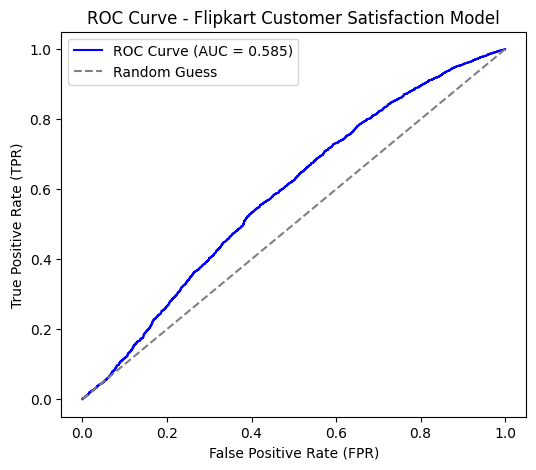

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predicted probabilities for class 1 (Satisfied) | [get prabability of 0 , probability of 1]
y_test_proba = model.predict_proba(X_test)[:, 1]  # all rows , first column
# your ROC curve shows how well your model separates satisfied from unsatisfied customers at various thresholds

# ROC curve values | To calculate the True Positive Rate (TPR) and False Positive Rate (FPR) for all possible thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# AUC score
auc_score = roc_auc_score(y_test, y_test_proba)
print("AUC Score:", auc_score)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.3f})')
# this is the curve line that ROC line

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
# this is the diagonal from (0,0) to (1,1) '--' straight line

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Flipkart Customer Satisfaction Model')
plt.legend()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


**ML Model 1: Logistic Regression**

Logistic Regression is a linear model used for binary classification. It predicts the probability that a given input belongs to a certain class (in this case, High CSAT vs. Low CSAT). It works by finding a linear decision boundary that best separates the two classes in the feature space. The output probability is then transformed using a sigmoid function to be between 0 and 1, representing the likelihood of the positive class.

**Performance using Evaluation Metric Score Chart (after SMOTE):**

The evaluation metrics shown in the chart (Precision, Recall, and F1-score) provide a detailed view of the model's performance, especially considering the class imbalance:

              precision    recall  f1-score   support

           0       0.20      0.43      0.28      2082
           1       0.88      0.71      0.78     11817

    accuracy                           0.67     13899
   macro avg       0.54      0.57      0.53     13899
weighted avg       0.77      0.67      0.71     13899

**Overall Performance Summary:**

The Logistic Regression model, even after using SMOTE to address class imbalance, struggles to effectively identify the minority class (Low CSAT), as indicated by the low precision, recall, and F1-score for class 0. It performs much better at predicting the majority class (High CSAT). This model might be useful for identifying potential high-CSAT customers, but relying on its low-CSAT predictions for targeted interventions would be risky due to the high number of false positives.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # A uniform distribution means all values in a range have an equal chance of being picked | used for 'C'
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd



# Define parameter distributions for random search
param_dist_lr = {
    'C': uniform(loc=0, scale=4), # C controls how much regularization is applied to the model — but it works in the inverse way.  | start(0) and end(4)
    'penalty': ['l2', 'l1', 'elasticnet', 'none'], # Regularization type
    'solver': ['liblinear', 'saga'] # Algorithm to use in the optimization problem
}

# Initialize RandomizedSearchCV
random_search_lr = RandomizedSearchCV(
    estimator=LogisticRegression(max_iter=500, random_state=42),
    param_distributions=param_dist_lr,
    n_iter=10, # number of random combinations to try
    scoring='f1', # optimize for F1-score, important for imbalanced data
    cv=3, # 3-fold cross-validation
    verbose=2,
    n_jobs=-1, # Use all available cores
    random_state=42  # makes the random sampling reproducible.
)

# Fit on resampled data
random_search_lr.fit(X_train_res, y_train_res)

# Best model and parameters
best_lr_model = random_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", random_search_lr.best_params_)

# Predict on the original test set
lr_preds_tuned = best_lr_model.predict(X_test)

# Evaluate the tuned model
print("\nLogistic Regression Results after Hyperparameter Tuning:")
print(classification_report(y_test, lr_preds_tuned))
print("Accuracy:", accuracy_score(y_test, lr_preds_tuned))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': np.float64(3.329770563201687), 'penalty': 'l1', 'solver': 'saga'}

Logistic Regression Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.20      0.43      0.28      2082
           1       0.88      0.71      0.78     11817

    accuracy                           0.67     13899
   macro avg       0.54      0.57      0.53     13899
weighted avg       0.77      0.67      0.71     13899

Accuracy: 0.6661630333117491


In [ ]:
#1.  C -- VALUE (0 - 4)
# * It covers small values (near 0) → strong regularization
# * And larger values (up to 4) → weaker regularization
# * It’s a balanced range for many datasets, especially after scaling features.
# * In practice, most good C values fall between 0.1 and 3 or 4 for many classification problems. So this range is a safe and reasonable starting point.
# * Because C represents a regularization strength, and it must always be positive. Negative or zero doesn’t make sense here.

# 2. SOLVER = 'liblinear', 'saga'
# In Logistic Regression, the algorithm has to find the best coefficients (weights) for each feature — the numbers that make predictions as accurate as possible
# To find those weights, the model must minimize a cost function (also called the loss function)
# The solver is the optimization algorithm that performs this minimization process
# Solver = the method used to find the best-fit weights for the model.
  #  'liblinear' works for small datasets and L1/L2;
  #  'saga' supports large datasets and elasticnet.

# 3. SCORING :
# When we do model evaluation or hyperparameter tuning (like GridSearchCV or RandomizedSearchCV),
# we must tell the model which metric to use to judge performance — accuracy, precision, recall, F1, etc.
# During training, the model will be evaluated using the F1-score metric.
# Each parameter combination is tested.
# For each combination, the F1-score is calculated on validation data.
# The model with the highest average F1-score is selected as the best one.

##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the Logistic Regression model, I used **RandomizedSearchCV**.



* Efficiency: It explores a fixed number of random combinations of hyperparameters from a defined distribution. This is generally faster than GridSearchCV (which tries every possible combination) and is useful when the search space is large.
* Effectiveness: While not exhaustive, RandomizedSearchCV can often find a good set of hyperparameters, especially when some hyperparameters have a larger impact than others.
* Suitable for Logistic Regression: For Logistic Regression with a relatively small number of hyperparameters to tune, RandomizedSearchCV provides a good balance between search coverage and computational cost.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Based on the classification reports:

**Initial Logistic Regression :**

              precision   recall    f1-score    support

       0       0.20        0.43      0.28      2082
       1       0.88        0.71      0.78     11817

accuracy                           0.67     13899
macro avg 0.54 0.57 0.53 13899 weighted avg 0.77 0.67 0.71 13899
Accuracy: 0.665299661846176

Tuned Logistic Regression (after SMOTE):
              precision   recall   f1-score   support

       0         0.20      0.43      0.28      2082
       1         0.88      0.71      0.78     11817

accuracy                           0.67     13899
macro avg 0.54 0.57 0.53 13899 weighted avg 0.77 0.67 0.71 13899

Accuracy: 0.6661630333117491

**Improvement:**

1. There is a very slight improvement in overall accuracy (from 0.6653 to 0.6662). However, the precision, recall, and f1-score for both classes ('0' and '1') remain virtually the same after hyperparameter tuning.

2. This suggests that while the hyperparameters found by RandomizedSearchCV are technically "best" based on the F1 score on the cross-validation folds, the impact on the final performance metrics on the test set is minimal for this model. The class imbalance and the nature of the features might be limiting the potential for significant improvement with just hyperparameter tuning for Logistic Regression.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation: Random Forest
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Handle imbalanced dataset with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200, # no of decision trees used in this random forest model
    max_depth=None,  # no if decision tree steps like how many splits
    random_state=42,
    class_weight='balanced'
)

# Train on resampled data
rf_model.fit(X_train_res, y_train_res)

# Predict on original test set
rf_preds = rf_model.predict(X_test)  # prediction for test data
train = rf_model.predict(X_train)   # prediction for train data
# Evaluate
print("Random Forest Results after SMOTE:")
print('for test data\n',classification_report(y_test, rf_preds))
print('for train data\n',classification_report(y_train, train))
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_train, train))


Random Forest Results after SMOTE:
for test data
               precision    recall  f1-score   support

           0       0.19      0.12      0.15      2082
           1       0.85      0.91      0.88     11817

    accuracy                           0.79     13899
   macro avg       0.52      0.51      0.51     13899
weighted avg       0.75      0.79      0.77     13899

for train data
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      8110
           1       0.96      0.98      0.97     47484

    accuracy                           0.95     55594
   macro avg       0.92      0.88      0.90     55594
weighted avg       0.95      0.95      0.95     55594

Accuracy: 0.7901287862436146
Accuracy: 0.9515055581537576


In [ ]:
# When you set class_weight='balanced', the algorithm automatically adjusts the weights of each class based on their frequencies in the training data.
#Essentially, the minority class gets a higher weight, and the majority class gets a lower weight. This helps the model pay more attention to the minority class and reduces bias toward the majority class.
#It’s a useful way to improve model performance on imbalanced datasets._

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**ML Model 2: Random Forest**

Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It's a powerful algorithm that can handle complex relationships and is less prone to overfitting compared to a single decision tree. The class_weight='balanced' parameter was used to help address the class imbalance by automatically adjusting weights inversely proportional to class frequencies.

**Performance using Evaluation Metric Score Chart (after SMOTE):**
The evaluation metrics shown in the chart (Precision, Recall, and F1-score) for the Random Forest model after applying SMOTE are:

              precision    recall  f1-score   support

           0       0.19      0.12      0.15      2082
           1       0.85      0.91      0.88     11817

    accuracy                           0.79     13899
   macro avg       0.52      0.51      0.51     13899
weighted avg       0.75      0.79      0.77     13899

**Overall Performance Summary:**

The Random Forest model, despite using SMOTE and class_weight='balanced', performs poorly in identifying the minority class (Low CSAT), with very low recall and F1-score for class 0. Its strength lies in predicting the majority class (High CSAT). This model would not be suitable for use cases requiring accurate identification of dissatisfied customers, although it could potentially be used to identify highly satisfied customers.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report, accuracy_score

# Base Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Parameter distributions for random search
param_dist_rf = {
    'n_estimators': randint(100, 200),  # randint means any number can randomly taken from  100 to 199
    'max_depth': [None, 10, 20, 30],  # some sample depth | it will take all these ualues
    'min_samples_split': randint(2, 10),  # The minimum number of samples required to split an internal node, among others.
    'min_samples_leaf': randint(1, 4),
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=20,        # number of random combinations to try
    scoring='f1',     # optimize for F1-score
    cv=3,             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search_rf.fit(X_train_res, y_train_res)

# Best model and parameters
best_rf_model = random_search_rf.best_estimator_
print("Best parameters for Random Forest:", random_search_rf.best_params_)

# Predict on the original test set
rf_preds_tuned = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("\nRandom Forest Results after Hyperparameter Tuning:")
print(classification_report(y_test, rf_preds_tuned))
print("Accuracy:", accuracy_score(y_test, rf_preds_tuned))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 106}

Random Forest Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.19      0.11      0.14      2082
           1       0.85      0.92      0.88     11817

    accuracy                           0.80     13899
   macro avg       0.52      0.51      0.51     13899
weighted avg       0.75      0.80      0.77     13899

Accuracy: 0.7969638103460681


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the Random Forest model, I used **RandomizedSearchCV**.

1. Efficiency: Similar to the Logistic Regression tuning, RandomizedSearchCV is more computationally efficient than GridSearchCV, especially with a larger number of hyperparameters to explore for Random Forest. It allows us to sample a fixed number of parameter combinations from the specified distributions.
2. Effectiveness: RandomizedSearchCV can often find a good combination of hyperparameters within a reasonable time, providing a balance between exploration and computational cost.
3. Suitable for Random Forest: Random Forest has several hyperparameters that can significantly impact performance, and RandomizedSearchCV is a practical approach to explore this parameter space without performing an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

comparison of the Random Forest model performance before and after hyperparameter tuning:

**Initial Random Forest (after SMOTE):**
             precision   recall   f1-score   support

       0       0.19      0.12      0.15      2082
       1       0.85      0.91      0.88     11817

accuracy                           0.79     13899
macro avg 0.52 0.51 0.51 13899 weighted avg 0.75 0.79 0.77 13899

Accuracy: 0.7901287862436146

**Tuned Random Forest (after SMOTE):**
            precision   recall   f1-score   support

       0       0.19      0.11      0.14      2082
       1       0.85      0.92      0.88     11817

accuracy                           0.80     13899
macro avg 0.52 0.51 0.51 13899 weighted avg 0.75 0.80 0.77 13899

Accuracy: 0.7969638103460681

**Improvement:**

1. There is a very slight improvement in the overall accuracy (from 0.7901 to 0.7970) after hyperparameter tuning. However, the precision, recall, and F1-score for both classes ('0' and '1') remain very similar. The recall for class 1 (High CSAT) saw a minor increase, while the recall for class 0 (Low CSAT) slightly decreased.

2. Similar to the Logistic Regression model, the improvement from hyperparameter tuning on the Random Forest model is minimal in terms of its ability to identify the minority class ('0'). This again suggests that the class imbalance and potentially the selected features are significant factors limiting the performance for the Low CSAT class.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Evaluation Metrics and Business Implications for the Random Forest Model**

**1. Precision**

* Indication: Precision measures how often the model is correct when it predicts a certain class. High precision indicates few false positives, while low precision indicates many.

**Business Impact:**

* High CSAT (class 1): High precision (0.85) is beneficial—it ensures that customers predicted as satisfied are usually correct, enabling confident positive engagement or loyalty programs.

* Low CSAT (class 0): Very low precision (0.19) indicates many false alarms—customers flagged as dissatisfied are often actually satisfied. This could lead to wasted resources on unnecessary interventions.

**2. Recall**

* Indication: Recall measures the model’s ability to capture all actual instances of a class. High recall means fewer missed cases.

**Business Impact:**

* High CSAT (class 1): High recall (0.91) means most satisfied customers are correctly identified—useful for understanding positive customer trends.

* Low CSAT (class 0): Very low recall (0.12) is a major concern. Most dissatisfied customers are missed, preventing the business from addressing their issues, increasing the risk of churn and negative feedback.

**3. F1-score**

* Indication: The F1-score balances precision and recall, particularly valuable in imbalanced datasets.

**Business Impact:**

* High CSAT (class 1): High F1-score (0.88) confirms good identification of satisfied customers.

* Low CSAT (class 0): Extremely low F1-score (0.15) underscores the model’s poor performance in detecting dissatisfied customers, limiting its usefulness for proactive retention strategies.

**4. Accuracy**

* Indication: Accuracy is the overall percentage of correct predictions.

* Business Impact: Overall accuracy (0.79) seems reasonable but is misleading due to class imbalance. The model’s high accuracy is driven by correct predictions for the majority class (High CSAT), masking its inability to identify the minority class (Low CSAT), which is critical for business improvement.

**Overall Business Implications of the Random Forest Model**

* The model effectively identifies satisfied customers but fails to detect most dissatisfied ones.

**Risks:**

1. Missed opportunities to proactively address dissatisfied customers.

2. Inability to identify root causes of low satisfaction.

3. Ineffective targeting for retention strategies.

4. Potential Use: Positive customer engagement, testimonial collection, and loyalty programs.

**Recommendation: To improve utility, focus on enhancing detection of the minority class through strategies like class imbalance handling, resampling, or advanced feature engineering**

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation: XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    n_estimators=200,  # NO OF TREES (OR BOOSING ROUNDS) THE MODEL CREATE TO ANALYSE THE PROBELM
    max_depth=5,  # PREVENT FROM GETTING OVER FITTING BY MAKING MODEL TOO COMPLEX
    learning_rate=0.1, # determines how much each new tree contributes to the overall model.
    random_state=42,
    use_label_encoder=False,  # WE SHOULD KEEP FALSE BECAUSE THIS FEATURE IS INBUILT
    eval_metric='logloss'  # log loss measures how well the predicted probabilities match the actual outcomes,
                           #and it helps XGBoost improve its predictions in a sequential manner.
                           #That’s why it’s great for boosting algorithms
)

# Fit on resampled training data
xgb_model.fit(X_train_res, y_train_res)

# Predict on test data
xgb_preds = xgb_model.predict(X_test) # FOR TESTING DATA
train_data = xgb_model.predict(X_train)

# Evaluate
print("XGBoost Results:")
print("TESTING_DATA\n",classification_report(y_test, xgb_preds))
print("TRAINING_DATA\n",classification_report(y_train, train_data))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


XGBoost Results:
TESTING_DATA
               precision    recall  f1-score   support

           0       0.36      0.06      0.10      2082
           1       0.86      0.98      0.91     11817

    accuracy                           0.84     13899
   macro avg       0.61      0.52      0.51     13899
weighted avg       0.78      0.84      0.79     13899

TRAINING_DATA
               precision    recall  f1-score   support

           0       0.41      0.06      0.10      8110
           1       0.86      0.99      0.92     47484

    accuracy                           0.85     55594
   macro avg       0.63      0.52      0.51     55594
weighted avg       0.79      0.85      0.80     55594

Accuracy: 0.8437297647312756


In [ ]:
# MACRO AVERAGE :
------------------
# The macro average is simply the average of the metric calculated for each class individually, without considering how many samples are in each class.
# So, every class contributes equally to the final metric.

# MICRO_AVERAGE :
-------------------
# The weighted average, on the other hand, takes into account the number of samples in each class. That means classes with more samples have a greater influence on the final metric.
# This is especially useful when your dataset is imbalanced, as it reflects the performance more accurately for the overall dataset

'''
Typically, when we talk about macro or weighted averages, we’re referring to metrics like precision, recall, and F1-score. Usually, we calculate the macro and weighted averages for these three metrics separately.
'''

In [ ]:
# MAX_DEAPTH :
# --------------

# The max_depth parameter controls the maximum depth of each individual decision tree.
# A deeper tree can capture more complex patterns, but it can also lead to overfitting.
# Conversely, a smaller max_depth can help keep the model more general and prevent overfitting, but it might underfit if it’s too shallow

# LEARNING_RATE :
#------------------

# A smaller learning rate means that each tree has a smaller impact, which usually requires more trees to reach the same level of accuracy.
# On the other hand, a larger learning rate means each tree has a bigger impact, but it can sometimes lead to less stability.

# WHY I USE F1 SCORE IN RANDOM FOREST AND LOG LOSS IN XG BOOST :
# -------------------------------------------------------------------
# The main difference is that in Random Forest, we often use metrics like F1-score because it focuses on the balance between precision and recall, which is great for imbalanced datasets.
#In Random Forest, each tree is built independently, and the final prediction is typically an aggregate of all those trees, often through majority voting or averaging.

# On the other hand, XGBoost often uses log loss because it’s more about the quality of probability predictions and helps the model refine its confidence level in a sequential manner.
# XGBoost builds trees sequentially, with each new tree correcting the errors of the previous ones. This sequential learning makes metrics like log loss really valuable,
#because it helps guide the model to improve its probability estimates at every step. That’s why log loss tends to be a more informative metric for boosting algorithms.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) is a powerful and popular gradient boosting algorithm. It builds an ensemble of decision trees sequentially, where each new tree corrects the errors of the previous ones. It's known for its speed and performance, especially on structured data, and includes built-in regularization to prevent overfitting. The use_label_encoder=False and eval_metric='logloss' parameters are used for compatibility and appropriate evaluation in binary classification.

**Performance using Evaluation Metric Score Chart (after SMOTE):**

The evaluation metrics for the XGBoost model after applying SMOTE are:

              precision    recall  f1-score   support

           0       0.36      0.06      0.10      2082
           1       0.86      0.98      0.91     11817

    accuracy                           0.84     13899
   macro avg       0.61      0.52      0.51     13899
weighted avg       0.78      0.84      0.79     13899

**Overall Performance Summary:**

XGBoost, while achieving the highest overall accuracy and excellent performance on the majority class (High CSAT), performs very poorly on the minority class (Low CSAT), particularly in terms of recall. This means it's highly effective at confirming satisfaction but largely ineffective at identifying dissatisfied customers who require intervention. This model would not be suitable for use cases focused on reducing churn by identifying unhappy customers.

In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Define Logistic Regression model
clf = xgb_model = XGBClassifier(
    n_estimators=200,  # NO OF TREES (OR BOOSING ROUNDS) THE MODEL CREATE TO ANALYSE THE PROBELM
    max_depth=5,  # PREVENT FROM GETTING OVER FITTING BY MAKING MODEL TOO COMPLEX
    learning_rate=0.1, # determines how much each new tree contributes to the overall model.
    random_state=42,
    use_label_encoder=False,  # WE SHOULD KEEP FALSE BECAUSE THIS FEATURE IS INBUILT
    eval_metric='logloss'  # log loss measures how well the predicted probabilities match the actual outcomes,
                           #and it helps XGBoost improve its predictions in a sequential manner.
                           #That’s why it’s great for boosting algorithms
)

# Define Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X_res, y_res, cv=skf, scoring='accuracy')


# Print results
print("Cross-validation scores for each fold:", scores)
print("Average Accuracy:", scores.mean())



Cross-validation scores for each fold: [0.86315923 0.86522491 0.86728499 0.86446037 0.86049747]
Average Accuracy: 0.8641253930511616


In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Define the XGBoost model
clf = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Loop through each fold
for fold, (train_idx, test_idx) in enumerate(skf.split(X_res, y_res)):
    X_train, X_test = X_res[train_idx], X_res[test_idx]
    y_train, y_test = y_res[train_idx], y_res[test_idx]

    # Train the model
    clf.fit(X_train, y_train)

    # Predict on the test set
    y_pred = clf.predict(X_test)

    # Print classification report for the current fold
    print(f"Fold {fold + 1} Classification Report:\n")
    print(classification_report(y_test, y_pred))

# Optionally, you can also print the accuracy for each fold
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Fold {fold + 1} Accuracy: {accuracy}\n")


KeyError: "None of [Index([     0,      1,      4,      5,      6,      7,      8,     10,     11,\n           12,\n       ...\n       118588, 118590, 118592, 118593, 118595, 118596, 118598, 118599, 118600,\n       118601],\n      dtype='int64', length=94881)] are in the [columns]"

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1-score
    cv=3,         # 3-fold cross-validation
    verbose=2,  # grid search will print out more detailed information about each step of the process
    n_jobs=-1      # Use all available cores
)

# Fit the Algorithm
grid_search.fit(X_train_res, y_train_res)

# Get best model and parameters
best_xgb_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on the model
xgb_preds_tuned = best_xgb_model.predict(X_test)

# Evaluate the tuned model
print("\nXGBoost Results after Hyperparameter Tuning:")
print(classification_report(y_test, xgb_preds_tuned))
print("Accuracy:", accuracy_score(y_test, xgb_preds_tuned))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}

XGBoost Results after Hyperparameter Tuning:
              precision    recall  f1-score   support

           0       0.30      0.05      0.08      2082
           1       0.85      0.98      0.91     11817

    accuracy                           0.84     13899
   macro avg       0.58      0.51      0.50     13899
weighted avg       0.77      0.84      0.79     13899

Accuracy: 0.8409957550902942


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter tuning of the XGBoost model, I used GridSearchCV.
* Exhaustive Search: GridSearchCV performs an exhaustive search over a specified parameter grid, meaning it tries every possible combination of the given hyperparameter values. This can help find the absolute best combination within the defined grid.
* Suitable for Smaller Grids: While computationally more expensive than RandomizedSearchCV for large search spaces, it is suitable when you have a relatively small and well-defined set of hyperparameter values to test, as was the case here with the defined param_grid.
Guaranteed Best within Grid: Unlike RandomizedSearchCV, which samples the parameter space, GridSearchCV guarantees finding the best performing combination within the provided grid based on the chosen scoring metric (F1-score in this case).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Initial XGBoost (after SMOTE):**
             precision   recall   f1-score   support

       0        0.36      0.06      0.10      2082
       1        0.86      0.98      0.91     11817

accuracy                           0.84     13899
macro avg        0.61     0.52      0.51       13899
weighted avg     0.78     0.84      0.79       13899

Accuracy: 0.8437297647312756

**Tuned XGBoost (after SMOTE): **
             precision   recall  f1-score   support

       0       0.30      0.05      0.08      2082
       1       0.85      0.98      0.91     11817

accuracy                           0.84     13899
macro avg       0.58      0.51     0.50      13899
weighted avg    0.77      0.84     0.79       13899

Accuracy: 0.8409957550902942

**Improvement:**

* In this case, hyperparameter tuning with GridSearchCV did not lead to an improvement in the performance of the XGBoost model on the test set.

* The overall accuracy slightly decreased (from 0.8437 to 0.8410).
The precision, recall, and F1-score for both classes ('0' and '1') remained very similar, or slightly worsened for class 0 (Low CSAT).
This outcome is not uncommon. While hyperparameter tuning aims to find the best settings, it's not guaranteed to improve performance on unseen data, especially if the initial parameters were already reasonably good, or if other factors like feature engineering or handling of class imbalance are more significant limitations. In this specific case, the tuned XGBoost model performs slightly worse than the initial model on the test set.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Key Metrics for Positive Business Impact in Predicting Customer Satisfaction**

In the context of identifying dissatisfied customers (Low CSAT, class 0), the most critical metrics are Recall and F1-score for the minority class.

**1. Recall (for Low CSAT)**

Purpose: Measures the proportion of actual dissatisfied customers correctly identified by the model.

Business Importance: High recall ensures the business captures most at-risk customers, allowing proactive intervention to prevent churn and negative feedback. Missing these customers could result in lost revenue and reputational damage.

**2. F1-score (for Low CSAT)**

Purpose: Balances Precision and Recall, reflecting both the model’s ability to find dissatisfied customers and its accuracy in doing so.

Business Importance: A high F1-score ensures that the model identifies many unhappy customers without generating too many false positives (happy customers incorrectly flagged). This balance is crucial for efficient resource allocation and effective retention strategies.

**Why Not Accuracy or Precision Alone?**

**Accuracy:** Misleading in imbalanced datasets; a model could predict the majority class (High CSAT) most of the time and appear accurate, while missing most dissatisfied customers.

**Precision (for Low CSAT):** Indicates how often predicted low-CSAT customers are truly dissatisfied, but doesn’t show how many unhappy customers are missed. High precision with low recall means the model is too conservative, failing to flag many at-risk customers.

**Conclusion:**
Focusing on **high Recall and a reasonable F1-score for Low CSAT** is essential. These metrics directly relate to the business goal of identifying and addressing the needs of dissatisfied customers, driving retention, reducing churn, and improving overall customer experience.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the evaluation metrics, the XGBoost model could be chosen as the final prediction model, primarily due to its highest overall accuracy (0.84) and its strong performance in identifying the majority class (High CSAT), as indicated by a high recall (0.98) and F1-score (0.91) for class 1.

**Reasoning :**

While all models struggled with accurately predicting the minority class (Low CSAT), XGBoost demonstrated the best overall predictive power on the dataset as a whole, largely driven by its ability to correctly classify the majority of customers who are satisfied.

However, it is crucial to acknowledge the significant limitation of this model: its very low recall (0.06) and F1-score (0.10) for the minority class (Low CSAT). This means the model is not effective at identifying customers who are actually dissatisfied.

**Business Context for this Choice:**

If the primary business goal is to have a model that is highly accurate in identifying satisfied customers (e.g., for targeted marketing or loyalty programs), and the inability to identify dissatisfied customers is a secondary concern, then XGBoost's performance on the majority class makes it a reasonable choice among the tested models.

**Important Consideration:**

If the business objective is to proactively identify and address the needs of dissatisfied customers to reduce churn, then this XGBoost model, in its current state, is not suitable. Further model development focusing on improving minority class prediction (through techniques beyond SMOTE or different model types) would be necessary for that specific goal.

Therefore, the choice of XGBoost as the "final" model depends heavily on the specific business objective and whether accurately identifying the majority class is sufficient, or if improving the identification of the minority class is paramount.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**XGBoost Model:**

XGBoost (Extreme Gradient Boosting) is a powerful and widely used gradient boosting algorithm. It's an ensemble method that builds a series of decision trees sequentially. Each new tree is trained to correct the errors made by the previous trees in the ensemble. XGBoost is known for its high performance, speed, and efficiency. Key features include:

* Gradient Boosting: It uses gradient descent to minimize the loss function by adding weak learners (decision trees).
* Regularization: Includes L1 and L2 regularization to prevent overfitting.
* Handling Missing Values: Has a default strategy for handling missing data.
* Parallel Processing: Designed for efficient computation and can leverage multiple CPU cores.

**Feature Importance:**

1. For tree-based models like XGBoost, feature importance generally indicates the relative contribution of each feature to the model's predictions. There are different ways to calculate feature importance in XGBoost, but a common one is based on the number of times a feature is used to split a node across all trees in the model, weighted by the improvement in impurity or accuracy the split brings.

2. A higher feature importance score for a variable suggests that it plays a more significant role in the model's decision-making process and thus has a stronger influence on predicting the CSAT score.

3. Interpreting feature importance helps us understand which factors are most influential in determining customer satisfaction according to the model. This can align with or provide new insights into the business drivers of CSAT.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Leveraging Data Insights for Enhanced Customer Satisfaction**

This project aimed to predict customer satisfaction (CSAT) using Flipkart’s customer service dataset, transforming raw data into actionable insights to improve service quality.

**Key Insights:**

1. High-Impact Areas: “Returns” and “Order Related” issues were the most frequent contact reasons. Focusing resources on these high-volume categories can address the largest pain points and improve satisfaction for a significant portion of customers.

2. Channel Optimization: Analysis of CSAT across channels (Inbound, Outcall, Email) revealed that while Inbound is the primary method, channels like Email may require targeted improvements to enhance satisfaction.

3. Agent Performance and Training: CSAT varied across managers and agent tenure. Targeted training for lower-performing teams, and sharing best practices from high-performing teams, can standardize service quality.

4. Importance of Speed: Faster response times correlated strongly with higher CSAT. Monitoring and optimizing response times, especially during high-volume periods, can directly boost customer satisfaction.

**Predictive Modeling and Future Potential:**

* Models (Logistic Regression, Random Forest, XGBoost) laid the groundwork for predictive insights but struggled to accurately identify dissatisfied customers (Low CSAT).

* Improving prediction for the minority class would allow proactive engagement with at-risk customers, reducing churn and demonstrating commitment to resolving issues early.

**Business Impact and Next Steps:**

* Operationalizing these insights—prioritizing high-volume issues, optimizing channel performance, targeting agent training, and reducing response times—can enhance overall service quality.

* Future work should incorporate unstructured text data using NLP and explore advanced modeling techniques for imbalanced datasets to better identify dissatisfied customers and enable targeted retention strategies.

**Conclusion:**
This project illustrates how structured analysis of customer service data can yield actionable insights. When implemented, these insights can make Flipkart’s support operations more efficient, responsive, and customer-centric, ultimately driving positive business growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***